In [1]:
"""
Analyze the PSF higher moments catalog of the HSC PDR1 dataset. Data can be requested from the author.
"""

'\nAnalyze the PSF higher moments catalog of the HSC PDR1 dataset. Data can be requested from the author.\n'

In [427]:
## %matplotlib inline  
import matplotlib.pyplot as plt
import csv
# Numpy
import numpy as np
from numpy import exp, log, minimum, sqrt
import math
# Scipy
from scipy import optimize
import pandas as pd
import seaborn as sns
from sklearn.utils import shuffle
import scipy

from os import listdir
from os.path import isfile, join
from astropy.io import fits
import galsim
from IPython.display import clear_output

from scipy.interpolate import griddata

from matplotlib import cm

from astropy.table import Table
from os import path
import os

from scipy.stats.stats import pearsonr   

from matplotlib.colors import LogNorm

from matplotlib.colors import SymLogNorm
from sklearn.decomposition import PCA

import matplotlib as mpl


In [428]:
SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 14

plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)     # fontsize of the x and y labels
plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)   # fontsize of the figure title

plt.rcParams["font.family"] = "Times New Roman"


In [429]:
catalog = pd.read_csv("HSC_higher_moments_all_six_neighbor.csv",header = 0)
#catalog = catalog[catalog['star_kurtosis']>0]
catalog = catalog[catalog['iblendedness_abs_flux']<0.001]

In [430]:
catalog = catalog[catalog['near_neighbor']==False]

In [237]:
print(len(catalog))

246935


In [431]:
snr = catalog['SNR']

1658.7103848637719


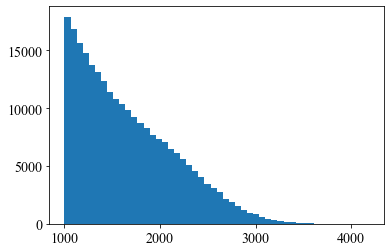

In [433]:
plt.hist(snr, bins = 50)
print(np.mean(snr))

In [238]:
def viewmap(field_index, moment_index, t_min, t_max, r_max):
    #field_index = 0

    single_size = xlim_field[field_index][1]- xlim_field[field_index][0],  ylim_field[field_index][1]- ylim_field[field_index][0]

    plt.figure(figsize = (single_size[0],3*single_size[1]+3))

    pq = pqlist[moment_index]


    plt.subplot(3,1,1)
    plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.4, hspace=0.4)

    plt.scatter(ra,dec,c=model_list[moment_index],cmap = 'viridis', s=0.3,vmin = t_min, vmax = t_max)

    plt.xlim(xlim_field[field_index])
    plt.ylim(ylim_field[field_index])
    plt.xlabel('ra')
    plt.ylabel('dec')
    plt.title('PSF Model Moment '+str(pq[0])+ ","+ str(pq[1])+ ' Map')
    plt.colorbar()


    plt.subplot(3,1,2)

    plt.scatter(ra,dec,c=true_list[moment_index],cmap = 'viridis', s=0.3,vmin = t_min, vmax = t_max)

    plt.xlim(xlim_field[field_index])
    plt.ylim(ylim_field[field_index])
    plt.xlabel('ra')
    plt.ylabel('dec')
    plt.title('PSF Truth Moment '+str(pq[0])+ ","+ str(pq[1])+ ' Map')
    plt.colorbar()

    residue = (np.array(model_30) - np.array(true_30))

    plt.subplot(3,1,3)

    plt.scatter(ra,dec,c=residue,cmap = 'RdBu', s=0.3,vmin = -r_max, vmax = r_max)
    plt.xlim(xlim_field[field_index])
    plt.ylim(ylim_field[field_index])
    plt.xlabel('ra')
    plt.ylabel('dec')
    plt.title('PSF Residual Moment '+str(pq[0])+ ","+ str(pq[1])+ ' Map')
    plt.colorbar()

In [239]:
ra, dec = catalog['ira'], catalog['idec']

model_40, model_31, model_22, model_13 , model_04 = list(catalog['model_moment40']),list(catalog['model_moment31']),list(catalog['model_moment22']),list(catalog['model_moment13']),list(catalog['model_moment04'])

true_40, true_31,  true_22, true_13, true_04 = list(catalog['star_moment40']),list(catalog['star_moment31']),list(catalog['star_moment22']),list(catalog['star_moment13']),list(catalog['star_moment04'])



In [240]:
ra, dec = catalog['ira'], catalog['idec']

model_30, model_21, model_12, model_03 = list(catalog['model_moment30']),list(catalog['model_moment21']),list(catalog['model_moment12']),list(catalog['model_moment03'])

true_30, true_21, true_12, true_03 = list(catalog['star_moment30']),list(catalog['star_moment21']),list(catalog['star_moment12']),list(catalog['star_moment03'])





In [241]:
ra, dec = catalog['ira'], catalog['idec']

model_20, model_11, model_02 = list(catalog['model_moment20']),list(catalog['model_moment11']),list(catalog['model_moment02'])

true_20, true_11, true_02 = list(catalog['star_moment20']),list(catalog['star_moment11']),list(catalog['star_moment02'])





In [242]:
model_50, model_41, model_32, model_23, model_14, model_05 = list(catalog['model_moment50']),list(catalog['model_moment41']),list(catalog['model_moment32']), list(catalog['model_moment23']), list(catalog['model_moment14']), list(catalog['model_moment05'])

true_50, true_41, true_32, true_23, true_14, true_05 = list(catalog['star_moment50']),list(catalog['star_moment41']),list(catalog['star_moment32']), list(catalog['star_moment23']), list(catalog['star_moment14']), list(catalog['star_moment05'])




In [243]:
model_60, model_51, model_42, model_33, model_24, model_15, model_06 = list(catalog['model_moment60']),list(catalog['model_moment51']),list(catalog['model_moment42']), list(catalog['model_moment33']), list(catalog['model_moment24']), list(catalog['model_moment15']), list(catalog['model_moment06'])

true_60, true_51, true_42, true_33, true_24, true_15, true_06 = list(catalog['star_moment60']),list(catalog['star_moment51']),list(catalog['star_moment42']), list(catalog['star_moment33']), list(catalog['star_moment24']), list(catalog['star_moment15']), list(catalog['star_moment06'])



In [244]:
print(np.mean(true_60), np.mean(true_40))

2.3979548585599146 0.8139454009456443


In [245]:

xlim_field = [[210,226],[29,39.5],[128,142],[175.5,183],[330,342],[236.5,248.5]]
ylim_field = [[-1.8,1.5],[-7,-1.8],[-2,5],[-1.8,1.3],[-0.8,2.2],[42,44.5]]

field_name = ['GAMA15H','XMM','GAMA09H','WIDE12H','VVDS','HECTOMAP']




In [246]:
## This is the reverse configuration

true_list = [true_20, true_11, true_02, true_30, true_21, true_12, true_03, true_40, true_31, true_22, true_13, true_04, true_50, true_41, true_32, true_23, true_14, true_05 , true_60, true_51, true_42, true_33, true_24, true_15, true_06]
model_list = [model_20, model_11, model_02, model_30, model_21, model_12, model_03, model_40, model_31, model_22, model_13, model_04, model_50, model_41, model_32, model_23, model_14, model_05, model_60, model_51, model_42, model_33, model_24, model_15, model_06]
pqlist = [(2,0),(1,1),(0,2),(3,0),(2,1),(1,2),(0,3),(4,0),(3,1),(2,2),(1,3),(0,4),(5,0),(4,1),(3,2),(2,3),(1,4),(0,5),(6,0),(5,1),(4,2),(3,3),(2,4),(1,5),(0,6)]
residual_list = np.array(model_list) - np.array(true_list)



In [351]:
## This is the corrected configuration

true_list = [true_02, true_11, true_20, true_03, true_12, true_21, true_30, true_04, true_13, true_22, true_31, true_40, true_05, true_14, true_23, true_32, true_41, true_50 , true_06, true_15, true_24, true_33, true_42, true_51, true_60]
model_list = [model_02, model_11, model_20, model_03, model_12, model_21, model_30, model_04, model_13, model_22, model_31, model_40, model_05, model_14, model_23, model_32, model_41, model_50 , model_06, model_15, model_24, model_33, model_42, model_51, model_60]
pqlist = [(0,2),(1,1),(2,0),(0,3),(1,2),(2,1),(3,0),(0,4),(1,3),(2,2),(3,1),(4,0),(0,5),(1,4),(2,3),(3,2),(4,1),(5,0),(0,6),(1,5),(2,4),(3,3),(4,2),(5,1),(6,0)]
residual_list = np.array(model_list) - np.array(true_list)



In [15]:
print(residual_list.shape)

(25, 246935)


In [18]:
rnd = np.random.randint(0, residual_list.shape[1], 100)
selected_residual_100 = residual_list.T[rnd][:, 3:]

In [19]:
selected_residual_100.shape

(100, 22)

In [21]:
np.save('../shapelet/data/residual_sample_100.npy', selected_residual_100)

In [14]:
index = [11,9,7,24,22,20,18]
mean_list = []
for i in range(7):
    mean_list.append(np.mean(residual_list[index[i]]))

In [15]:
np.save('mean4mul.npy',np.array(mean_list))

In [18]:
for field_code in range(6):
    index1 = ra>xlim_field[field_code][0]
    index2 = ra<xlim_field[field_code][1]
    index3 = dec>ylim_field[field_code][0]
    index4 = dec<ylim_field[field_code][1]

    total_index = index1 * index2 * index3 * index4

    ra_field = ra[total_index!=0]
    dec_field = dec[total_index!=0]
    g1 = residual_list[2][total_index!=0.0]/2.0 - np.mean(residual_list[2][total_index!=0.0]/2.0)
    g2 = residual_list[0][total_index!=0.0]/2.0 - np.mean(residual_list[0][total_index!=0.0]/2.0)

    t1 = Table([ra_field,dec_field,g1], names = ('ra','dec','field'))
    write_table(t1, 'HSCMaps/g1_'+str(field_code)+'.fits')
    
    t2 = Table([ra_field,dec_field,g2], names = ('ra','dec','field'))
    write_table(t2, 'HSCMaps/g2_'+str(field_code)+'.fits')

/Users/zhangtianqing/miniconda2/envs/galsim_env/lib/python2.7/site-packages/pandas/core/computation/expressions.py:183: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  .format(op=op_str, alt_op=unsupported[op_str]))
/Users/zhangtianqing/miniconda2/envs/galsim_env/lib/python2.7/site-packages/pandas/core/computation/expressions.py:183: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  .format(op=op_str, alt_op=unsupported[op_str]))
/Users/zhangtianqing/miniconda2/envs/galsim_env/lib/python2.7/site-packages/pandas/core/computation/expressions.py:183: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  .format(op=op_str, alt_op=unsupported[op_str]))
/Users/zhangtianqing/miniconda2/envs/galsim_env/lib/python2.7/site-packages/pandas/core/computation/exp

In [92]:
print np.sqrt(np.var(residual_list,axis = 1))[3:]

[0.00255605 0.00110501 0.00110913 0.00255967 0.00549403 0.00097054
 0.0014411  0.0009756  0.00516952 0.01404126 0.00357086 0.00269041
 0.00270563 0.00349186 0.01394609 0.03356136 0.00556355 0.00524192
 0.00288034 0.00514362 0.00538751 0.03234301]


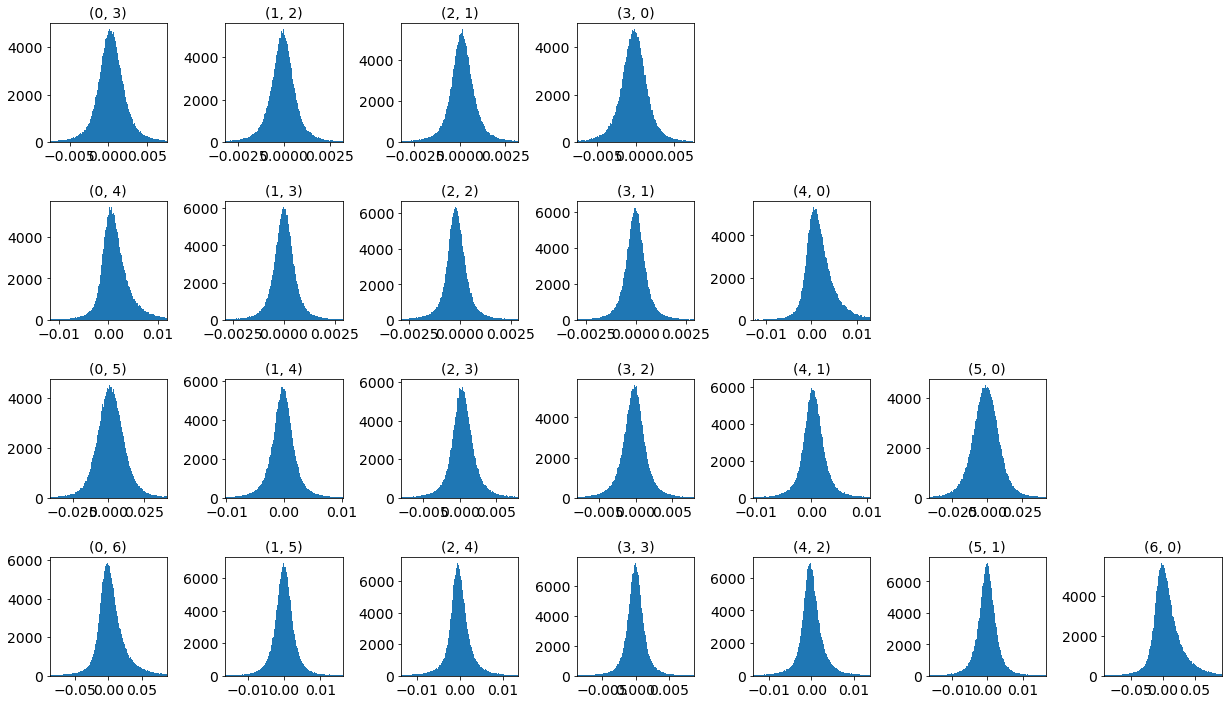

In [15]:
fig = plt.figure(figsize = (21,12))
fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.5, hspace=0.5)


for j in range(22):
    p,q = pqlist[j+3][0],pqlist[j+3][1]
    n = p+q
    ax = plt.subplot(4,7,1+7*(n-3)+p)

    std = np.std(residual_list[j+3])
    mean = np.mean(residual_list[j+3])
    plt.hist(residual_list[j+3],bins = 200,range = (-3*std, 3*std))
    
    
    plt.title(str((p,q)))
    plt.xlim([-3*std, +3*std])
    #plt.show()
    #plt.legend()
    
#fig.colorbar(axes)

In [145]:
import pickle

with open('data/params1.pkl', 'rb') as f:
    params1_dir = pickle.load(f)
with open('data/params2.pkl', 'rb') as f:
    params2_dir = pickle.load(f)

In [146]:
print(params1_dir)

{(0, 3): array([-5.07414934e-02,  3.22410592e-07,  1.21153971e-08]), (1, 2): array([-2.57416401e-02, -9.43577455e-08,  1.56297787e-10]), (2, 1): array([2.58069222e-02, 3.72194140e-07, 4.98867913e-09]), (3, 0): array([5.06541844e-02, 1.98657415e-07, 7.01838575e-09]), (0, 4): array([-1.37951454e+00, -2.47980142e-01,  3.62815350e-08]), (1, 3): array([-2.81145698e-01, -3.91339887e-03, -5.18875194e-09]), (2, 2): array([-5.65782191e-05,  5.76200521e-07, -3.23032383e-09]), (3, 1): array([ 2.80929964e-01, -3.91261702e-03,  4.27897823e-09]), (4, 0): array([ 1.37904010e+00,  2.47979980e-01, -1.87922109e-08]), (0, 5): array([-3.51729992e-02,  5.90720088e-06,  9.98480621e-09]), (1, 4): array([-6.06292292e-02,  1.00530849e-06,  6.35578105e-09]), (2, 3): array([-4.14585846e-04,  1.56906195e-06,  2.93249958e-08]), (3, 2): array([-9.00574549e-05,  7.11745025e-06,  1.27242602e-08]), (4, 1): array([6.05215520e-02, 7.36095781e-07, 6.61182037e-09]), (5, 0): array([ 3.53352300e-02, -1.88099596e-06, -7.0543

In [150]:
print(params2_dir)

{(0, 3): array([-2.39855812e-02,  1.60995605e-07,  1.35462661e-08]), (1, 2): array([-4.51477472e-02,  5.00859360e-07,  4.15456045e-12]), (2, 1): array([ 4.53213023e-02,  3.41931247e-07, -1.41850833e-09]), (3, 0): array([2.38232435e-02, 2.18833399e-07, 4.26953836e-09]), (0, 4): array([ 2.34954975e-02,  2.00331163e-03, -3.14445758e-09]), (1, 3): array([-6.48602350e-02,  3.76313839e-01, -3.34264181e-09]), (2, 2): array([-2.19273590e-05,  2.29471920e-07, -6.35236677e-09]), (3, 1): array([6.45680164e-02, 3.76310987e-01, 6.33540269e-09]), (4, 0): array([-2.35566780e-02, -2.00511922e-03, -1.18738439e-09]), (0, 5): array([6.13306376e-03, 3.11270771e-06, 1.87126797e-08]), (1, 4): array([-5.37674733e-03, -1.04417432e-07,  1.01211895e-08]), (2, 3): array([-2.67925216e-02,  1.77082904e-06,  3.77111987e-08]), (3, 2): array([2.62157369e-02, 3.37464719e-06, 1.10522747e-08]), (4, 1): array([5.41704921e-03, 7.36095664e-07, 9.99739867e-09]), (5, 0): array([-6.03131762e-03, -2.92009985e-06, -1.31945641e-

In [151]:
c1_tot = np.zeros(residual_list.shape)
c2_tot = np.zeros(residual_list.shape)

for i in range(3,25):
    this_pq = pqlist[i]
    this_param1 = params1_dir[(this_pq[0],this_pq[1])]
    this_param2 = params2_dir[this_pq]
    
    c1_tot[i] =  this_param1[2] + residual_list[i]*this_param1[1] + residual_list[i]**2*this_param1[0]
    c2_tot[i] =  this_param2[2] + residual_list[i]*this_param2[1] + residual_list[i]**2*this_param2[0]

In [152]:
print( np.mean(c1_tot,axis = 1))

[ 0.00000000e+00  0.00000000e+00  0.00000000e+00 -3.20090804e-07
 -2.92840645e-08  3.53858337e-08  3.35905013e-07 -3.72796152e-04
 -2.63714934e-07 -3.39520141e-09  2.94140991e-07  4.89754668e-04
 -6.63263247e-06 -6.94297622e-07  2.68999627e-08  1.04088977e-08
  7.65154856e-07  6.86683024e-06  3.27578971e-04 -1.81785648e-06
 -4.04051099e-05 -5.32766855e-07  2.24790718e-05  2.09969949e-06
 -6.05097822e-04]


In [153]:
mean_residual_list = np.mean(residual_list,axis = 1)
print( mean_residual_list)

[-2.03639841e-05  3.69430868e-03  5.85822998e-05  3.66028888e-04
 -8.76531746e-05  1.34684323e-04 -2.50264007e-04  1.40675765e-03
  1.05808564e-07 -1.92455508e-04 -5.49313319e-06  1.85469399e-03
  1.66785977e-03 -2.36631083e-04  3.66527373e-04 -2.35868734e-04
  3.70985832e-04 -1.11594362e-03  3.70208057e-03 -8.54346545e-06
 -3.37488458e-04 -8.47243097e-06 -1.68242044e-04 -4.90652904e-05
  6.30859700e-03]


In [124]:
mean_residual_list = np.mean(residual_list,axis = 1)
print( mean_residual_list)

[-2.03639841e-05  3.69430868e-03  5.85822998e-05  3.66028888e-04
 -8.76531746e-05  1.34684323e-04 -2.50264007e-04  1.40675765e-03
  1.05808564e-07 -1.92455508e-04 -5.49313319e-06  1.85469399e-03
  1.66785977e-03 -2.36631083e-04  3.66527373e-04 -2.35868734e-04
  3.70985832e-04 -1.11594362e-03  3.70208057e-03 -8.54346545e-06
 -3.37488458e-04 -8.47243097e-06 -1.68242044e-04 -4.90652904e-05
  6.30859700e-03]


In [27]:
pq_to_mean = dict()
for i in range(len(pqlist)):
    pq_to_mean[pqlist[i]] = mean_residual_list[i]
    

In [28]:
pq_order_simulation = [(0, 2),(1, 1),(2, 0),(0, 3),(1, 2),(2, 1),(3, 0),(0, 4),(1, 3),(2, 2),(3, 1),(4, 0),(0, 5),(1, 4),(2, 3),(3, 2),(4, 1),(5, 0),(0, 6),(1, 5),(2, 4),(3, 3),(4, 2),(5, 1),(6, 0)]

mean_for_simulation = []

for pq in pq_order_simulation:
    mean_for_simulation.append(pq_to_mean[pq])

np.save('../shapelet/data/mean_residual.npy', np.array(mean_for_simulation))





In [17]:
print(mean_for_simulation)

[-2.7210915195942924e-05, 0.0036947500105968764, 5.97435144443685e-05, 0.0003706455199224912, -8.561517507458113e-05, 0.00013692880875449518, -0.00024988827089172537, 0.001497367320122247, -1.7171106769026125e-06, -0.00018568337418628302, -6.405052410793572e-06, 0.001959133111581946, 0.0016905621757654435, -0.00023092935206198145, 0.00037289042378673126, -0.00023317371012388955, 0.00037943755922874723, -0.0011127091215667507, 0.004368520021689553, -2.2486807488255312e-05, -0.00028036735374720206, -1.175291976448932e-05, -0.00010386032480705674, -6.136422264892312e-05, 0.007121347173839072]


In [66]:
pq_to_error = dict()
for i in range(25):
    pq_to_error[pqlist[i]] = mean_residual_list[i]
new_order = []
for i in range(25):
    new_pq = pqlist[i]
    new_order.append(pq_to_error[(new_pq[1],new_pq[0])])
print new_order

[-2.7210915195942924e-05, 0.0036947500105968764, 5.97435144443685e-05, 0.00037256939545586386, -8.543114389611286e-05, 0.0001378658606396691, -0.0002516313348012394, 0.0014952706213846672, 1.8868190296566072e-08, -0.0001872069862827771, -5.932126227641839e-06, 0.001953801763521589, 0.0016915649752013977, -0.00022942603027643243, 0.0003737172574713498, -0.0002326016656519625, 0.0003793826434167092, -0.0011180377531281106, 0.004288821843255381, -6.378349604625537e-06, -0.0002903308605389229, -8.55422562327129e-06, -0.00011499552689537432, -4.514838792506807e-05, 0.007037653052025242]


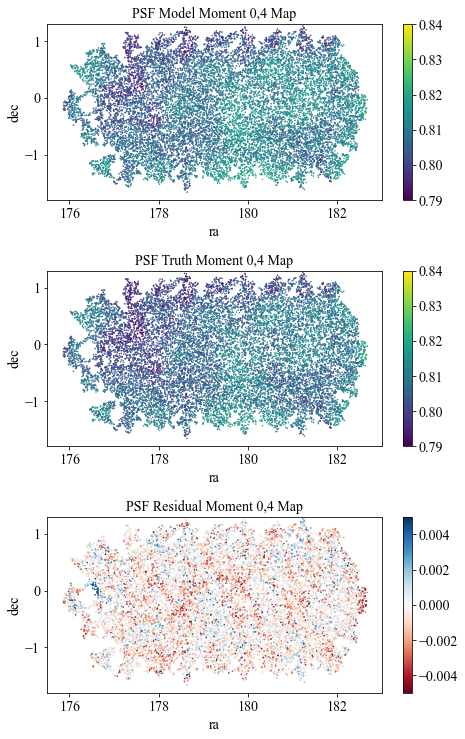

In [253]:
viewmap(3,7,0.79,0.84,0.005)

In [88]:
def viewmap_compact(field_index, moment_index, t_min, t_max, r_max, filename):
    #field_index = 0

    single_size = xlim_field[field_index][1]- xlim_field[field_index][0],  ylim_field[field_index][1]- ylim_field[field_index][0]

    pq = pqlist[moment_index]


    fig = plt.figure(figsize =  (single_size[0],single_size[1]+3))
    fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.0, hspace=0.0)

    
    
    ax = plt.subplot(2,1,1)

    plt.scatter(ra,dec,c=true_list[moment_index],cmap = 'viridis', s=0.3,vmin = t_min, vmax = t_max)

    plt.xlim(xlim_field[field_index])
    plt.ylim(ylim_field[field_index])
    plt.ylabel(r'dec (arcsec)')
    plt.title('PSF ('+str(pq[0])+ ","+ str(pq[1])+ ') Moment Truth and Residual')
    plt.colorbar(shrink=0.85)
    
    plt.text(xlim_field[field_index][0]+1, ylim_field[field_index][1]-1, 'Truth', fontsize = 18)

    
    ax.tick_params(
            axis='x',          # changes apply to the x-axis
            direction = 'in',
            which='both',      # both major and minor ticks are affected
            bottom=False,      # ticks along the bottom edge are off
            top=False,         # ticks along the top edge are off
            labelbottom=False)
    
    ax.tick_params(
        axis='y',          # changes apply to the x-axis
        direction = 'in',
        which='both',      # both major and minor ticks are affected
        left=True,      # ticks along the bottom edge are off
        right=False,         # ticks along the top edge are off
        labelleft=True)
    

    residue = (np.array(model_list[moment_index]) - np.array(true_list[moment_index]))

    ax = plt.subplot(2,1,2)

    plt.scatter(ra,dec,c=residue,cmap = 'RdBu', s=0.3,vmin = -r_max, vmax = r_max)
    plt.xlim(xlim_field[field_index])
    plt.ylim(ylim_field[field_index])
    plt.xlabel('ra (arcsec)')
    plt.ylabel('dec (arcsec)')
    #plt.title('PSF Residual Moment '+str(pq[0])+ ","+ str(pq[1])+ ' Map')
    plt.colorbar(shrink=0.85)
    plt.text(xlim_field[field_index][0]+1, ylim_field[field_index][1]-1, 'Residual', fontsize = 18)

    
    ax.tick_params(
        axis='x',          # changes apply to the x-axis
        direction = 'in',
        which='both',      # both major and minor ticks are affected
        bottom=True,      # ticks along the bottom edge are off
        top=True,         # ticks along the top edge are off
        labelbottom=False)
    
    ax.tick_params(
            axis='x',          # changes apply to the x-axis
            direction = 'in',
            which='both',      # both major and minor ticks are affected
            bottom=True,      # ticks along the bottom edge are off
            top=True,         # ticks along the top edge are off
            labelbottom=True)
    
    
    plt.savefig(filename,dpi = 100)

    
    
    

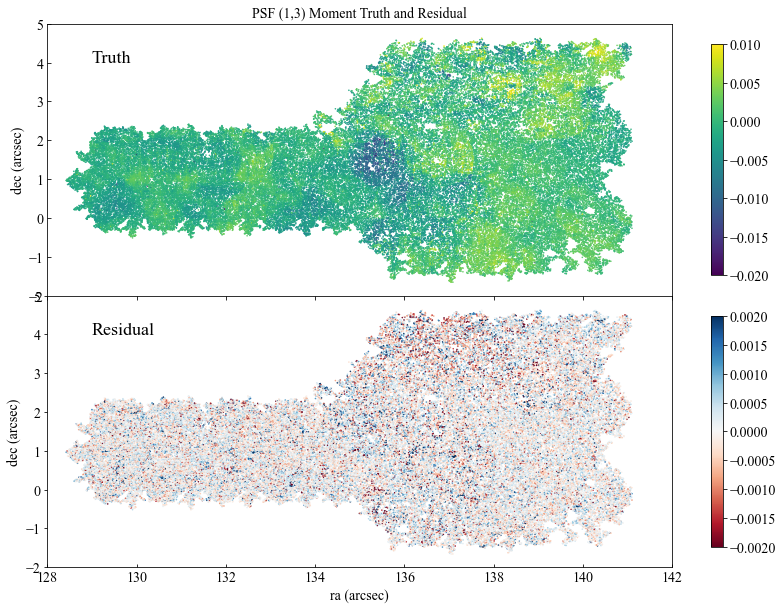

In [127]:
viewmap_compact(2,10,-0.02,0.01,0.002,'../plots2/hsc_example1.png')

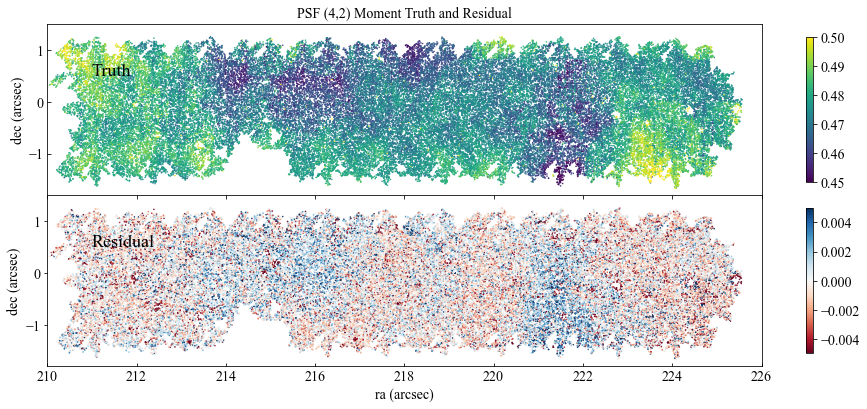

In [92]:
viewmap_compact(0,20,0.45,0.50,0.005,'../plots2/hsc_example2.png')

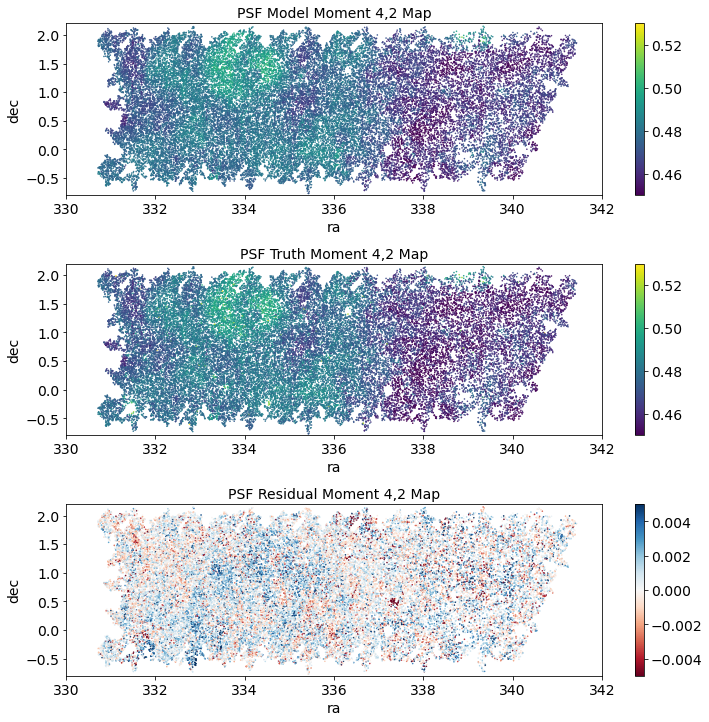

In [38]:
#field_index, moment_index, t_min, t_max, r_max
viewmap(4,20,0.45,0.53,0.005)

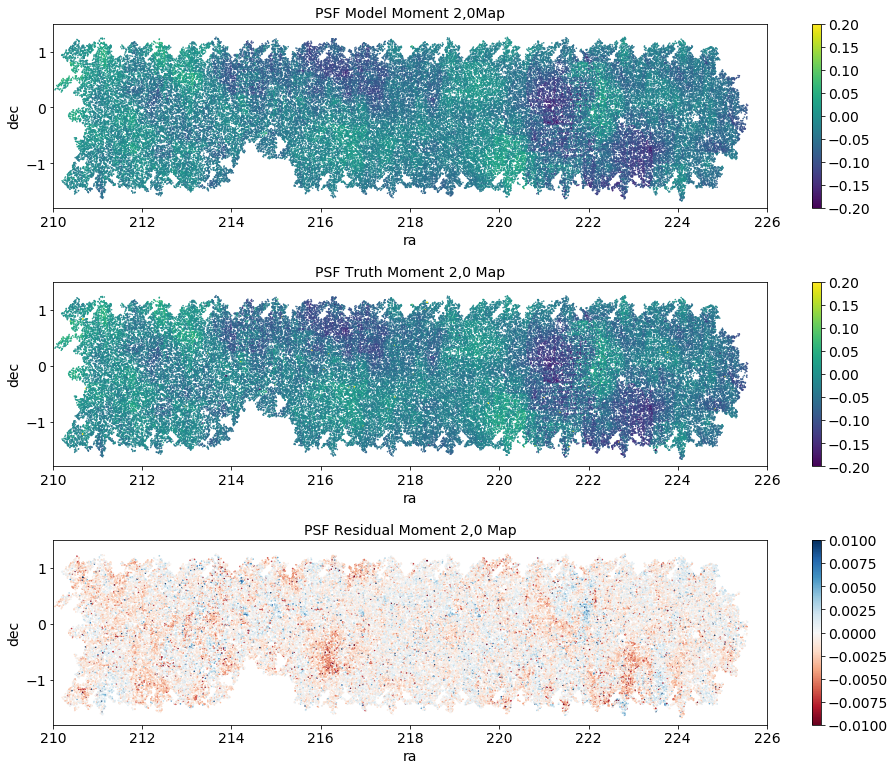

In [246]:
viewmap(0,0,-0.15,0.15,0.01)

In [125]:
def write_table(table,filename):
    if path.isfile(filename):
        os.remove(filename)
    table.write(filename,format = 'fits')

In [126]:
for i in range(3,25):
    pqtup = pqlist[i]
    
    t = Table([ra,dec,c1_tot[i], c2_tot[i]], names = ('ra','dec','shear1', 'shear2'))
    write_table(t, 'HSCMaps/c_'+str(pqtup[0])+str(pqtup[1])+'.fits')


In [349]:
zero_vector = np.zeros(c1_tot.shape[1])
print(zero_vector.shape)

(246935,)


In [352]:
for i in range(3,25):
    pqtup = pqlist[i]
    
    t1 = Table([ra,dec,c1_tot[i], zero_vector], names = ('ra','dec','shear1', 'shear2'))
    write_table(t1, 'HSCMaps/c1_'+str(pqtup[0])+str(pqtup[1])+'.fits')


    t2 = Table([ra,dec,zero_vector, c2_tot[i]], names = ('ra','dec','shear1', 'shear2'))
    write_table(t2, 'HSCMaps/c2_'+str(pqtup[0])+str(pqtup[1])+'.fits')
    
    

In [147]:
for i in range(len(true_list)):
    
    pqtup = pqlist[i]
    true = np.array(true_list[i])
    model = np.array(model_list[i])
        
    t1 = Table([ra,dec,true], names = ('ra','dec','field'))
    write_table(t1, 'HSCMaps/true_'+str(pqtup[0])+str(pqtup[1])+'.fits')

    residue = np.array(model) - np.array(true)
    
    t2 = Table([ra,dec,residue], names = ('ra','dec','field'))
    write_table(t2, 'HSCMaps/residue_'+str(pqtup[0])+str(pqtup[1])+'.fits')
    
    residue_fluctuation = residue - np.mean(residue)
    t3 = Table([ra,dec,residue_fluctuation], names = ('ra','dec','field'))
    write_table(t3, 'HSCMaps/residue_fluctuation_'+str(pqtup[0])+str(pqtup[1])+'.fits')

NameError: name 'write_table' is not defined

In [67]:
xi = np.load('HSCMaps/xi.npy')
xi_sig = np.load('HSCMaps/xi_sig.npy')
r = np.load("HSCMaps/r.npy")


In [149]:
def corr(l1, l2):
    return pearsonr(np.array(l1), np.array(l2))

In [150]:
correlation_matrix = np.zeros(shape = (50,50))


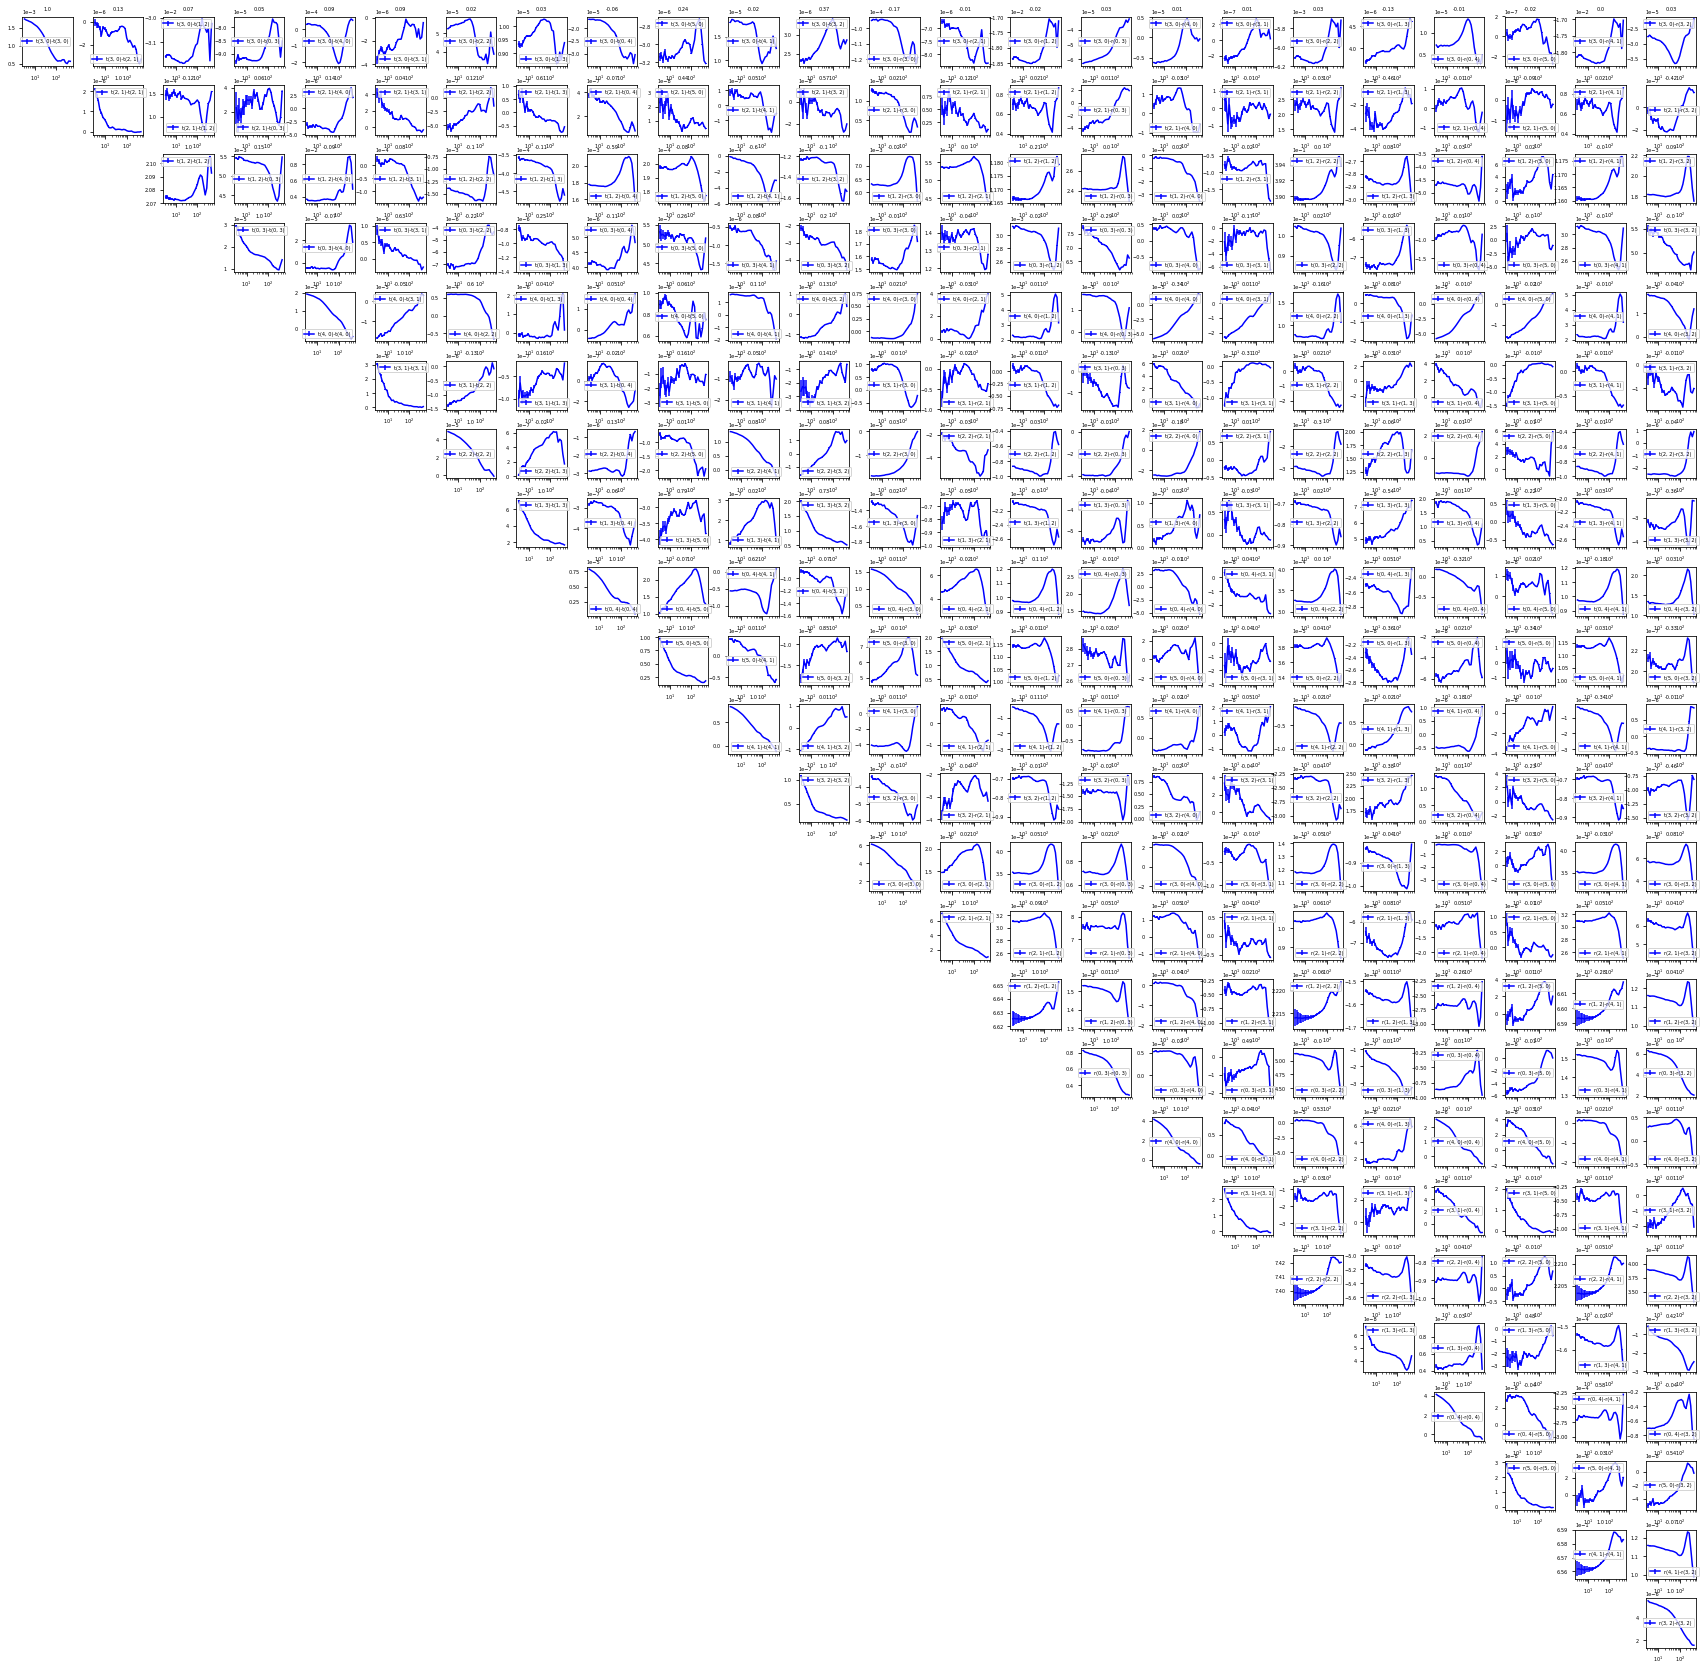

In [71]:
BIGGER_SIZE = 5
plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title



plt.figure(figsize = (30,30))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.4, hspace=0.4)

nob = 24
for i in range(nob):
    for j in range(i,nob):
#         if i%2==0:
#             i_pre = 't'
#             l1 = true_list[i/2]
#         else:
#             i_pre = 'r'
#             l1 = np.array(model_list[i/2]) - np.array(true_list[i/2])
            
#         if j%2==0:
#             j_pre = 't'
#             l2 = true_list[j/2]
#         else:
#             j_pre = 'r'
#             l2 = np.array(model_list[j/2]) - np.array(true_list[j/2])

        if i < 12:
            i_pre = 't'
            l1 = true_list[i]
        else:
            i_pre = 'r'
            l1 = np.array(model_list[i-12]) - np.array(true_list[i-12])
            
        if j < 12:
            j_pre = 't'
            l2 = true_list[j]
        else:
            j_pre = 'r'
            l2 = np.array(model_list[j-12]) - np.array(true_list[j-12])
            
            
        this_correlation = corr(l1,l2)[0]
        #print this_correlation
        label1 = i_pre+str(pqlist[i%12])+ "-" + j_pre+str(pqlist[j%12])
        
        correlation_matrix[i][j] = this_correlation
        correlation_matrix[j][i] = this_correlation
        
        
        plt.subplot(nob,nob,24*i+j+1)
        plt.errorbar(r,xi[i][j],xi_sig[i][j], color = 'blue',label = label1)
        plt.ticklabel_format(axis='y',style='sci',scilimits=(0,3))
        plt.xscale('log')
        #plt.ylim([-1,1])
        plt.title(str(round(this_correlation, 2)))
        plt.legend()

plt.savefig('HSCMaps/correlations.png', dpi = 300)

In [151]:
nob = 50
for i in range(nob):
    for j in range(i,nob):
        if i < 25:
            i_pre = 't'
            l1 = true_list[i]
        else:
            i_pre = 'r'
            l1 = np.array(model_list[i-25]) - np.array(true_list[i-25])
            
        if j < 25:
            j_pre = 't'
            l2 = true_list[j]
        else:
            j_pre = 'r'
            l2 = np.array(model_list[j-25]) - np.array(true_list[j-25])
        
        this_correlation = corr(l1,l2)[0]
        
        correlation_matrix[i][j] = this_correlation
        correlation_matrix[j][i] = this_correlation

In [152]:
nob = 50

label_list = []
for i in range(nob):
    if i < 25:
        i_pre = 't'
        
    else:
        i_pre = 'r'
        
    
    label1 = i_pre+str(pqlist[i%25][0])+str(pqlist[i%25][1])
    label_list.append(label1) 

In [154]:
import pickle
with open('../plots2/pickle/full_correlation.pkl','wb') as f:
    pickle.dump([correlation_matrix, label_list],f)

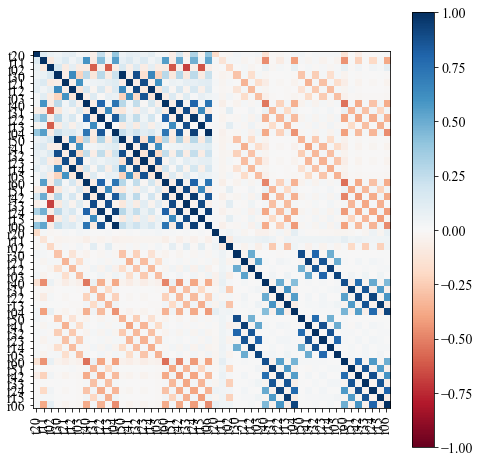

In [153]:
fig, ax = plt.subplots(1,1,figsize=(8, 8)) 
mappable = ax.imshow(correlation_matrix, cmap = 'RdBu',vmin = -1.0, vmax = 1.0)

# Set number of ticks for x-axis
# Set ticks labels for x-axis
ax.set_xticks(np.arange(0,50,1))
ax.set_yticks(np.arange(0,50,1))

ax.set_xticklabels(label_list, rotation='vertical', fontsize=14)
ax.set_yticklabels(label_list, rotation='horizontal', fontsize=14)

plt.colorbar(mappable, ax = ax)

In [103]:
residual_label = label_list[25:]
print( residual_label)

['r20', 'r11', 'r02', 'r30', 'r21', 'r12', 'r03', 'r40', 'r31', 'r22', 'r13', 'r04', 'r50', 'r41', 'r32', 'r23', 'r14', 'r05', 'r60', 'r51', 'r42', 'r33', 'r24', 'r15', 'r06']


In [38]:
reduced_index = [7,11,18,20,22,24,8,10,19,21,23]
reduced_covariance = np.zeros(shape = (11,11))
reduced_label = []
nob = 11
for i in range(nob):
    reduced_label.append(residual_label[reduced_index[i]])
    
    for j in range(i,nob):

        r1 = np.array(model_list[reduced_index[i]]) - np.array(true_list[reduced_index[i]])
        r1_shift = r1 - np.mean(r1)

        r2 = np.array(model_list[reduced_index[j]]) - np.array(true_list[reduced_index[j]])
        r2_shift = r2 - np.mean(r2)
        this_correlation = corr(r1_shift,r2_shift)[0]
        
        reduced_covariance[i][j] = this_correlation
        reduced_covariance[j][i] = this_correlation

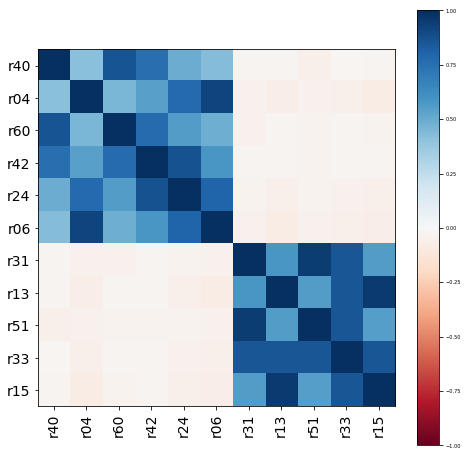

In [39]:
fig, ax = plt.subplots(1,1,figsize=(8, 8)) 
mappable = ax.imshow(reduced_covariance, cmap = 'RdBu',vmin = -1.0, vmax = 1.0)

# Set number of ticks for x-axis
# Set ticks labels for x-axis
ax.set_xticks(np.arange(0,11,1))
ax.set_yticks(np.arange(0,11,1))

ax.set_xticklabels(reduced_label, rotation='vertical', fontsize=14)
ax.set_yticklabels(reduced_label, rotation='horizontal', fontsize=14)

plt.colorbar(mappable, ax = ax)

In [104]:
reduced_index = [0,1,2,7,11,18,20,22,24,8,10,19,21,23]
reduced_covariance = np.zeros(shape = (14,14))
reduced_label = []
nob = 14
for i in range(nob):
    reduced_label.append(residual_label[reduced_index[i]])
    
    for j in range(i,nob):

        r1 = np.array(model_list[reduced_index[i]]) - np.array(true_list[reduced_index[i]])
        r1_shift = r1 - np.mean(r1)

        r2 = np.array(model_list[reduced_index[j]]) - np.array(true_list[reduced_index[j]])
        r2_shift = r2 - np.mean(r2)
        this_correlation = corr(r1_shift,r2_shift)[0]
        
        reduced_covariance[i][j] = this_correlation
        reduced_covariance[j][i] = this_correlation

NameError: name 'corr' is not defined

NameError: name 'reduced_covariance' is not defined

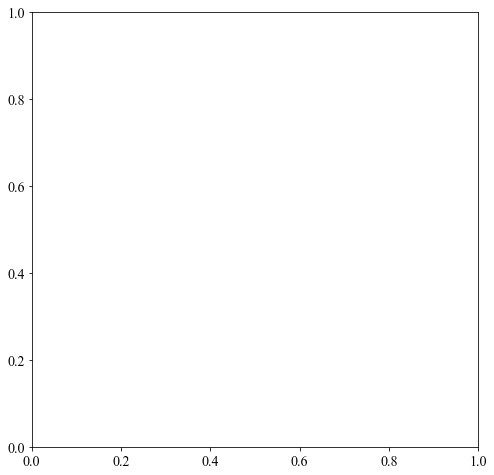

In [100]:
fig, ax = plt.subplots(1,1,figsize=(8, 8)) 
mappable = ax.imshow(reduced_covariance, cmap = 'RdBu',vmin = -1.0, vmax = 1.0)

# Set number of ticks for x-axis
# Set ticks labels for x-axis
ax.set_xticks(np.arange(0,14,1))
ax.set_yticks(np.arange(0,14,1))

ax.set_xticklabels(reduced_label, rotation='vertical', fontsize=14)
ax.set_yticklabels(reduced_label, rotation='horizontal', fontsize=14)

plt.colorbar(mappable, ax = ax)

In [111]:
residue_list = np.array(model_list) - np.array(true_list)


In [112]:
data = np.concatenate((np.array(true_list), residue_list), axis = 0)


In [113]:
cov = np.cov(data)


In [115]:
print( np.max(abs(cov)))
print( np.min(abs(cov)))

0.02905867693677157
5.75834439124936e-11


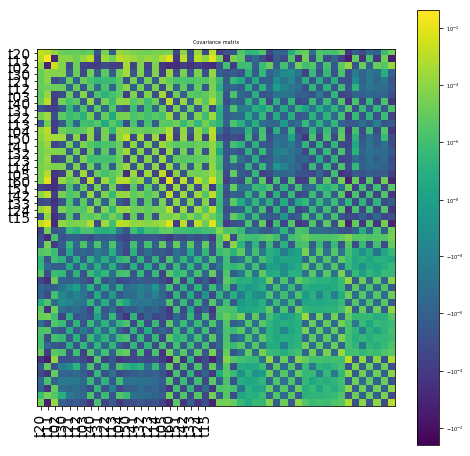

In [46]:
fig, ax = plt.subplots(1,1,figsize=(8, 8)) 

logthresh=-20
mappable = ax.imshow( cov ,
            vmin=float(-0.04), vmax=float(0.04),
            norm=SymLogNorm(5*10**(-9)) )


t = [10e-9, 10e-7, 10e-5, 10e-3, 10e-1,-10e-9,-10e-7,-10e-5,-10e-3,-10e-1]
plt.title("Covariance matrix")


ax.set_xticks(np.arange(0,24,1))
ax.set_yticks(np.arange(0,24,1))


ax.set_xticklabels(label_list, rotation='vertical', fontsize=14)
ax.set_yticklabels(label_list, rotation='horizontal', fontsize=14)

plt.colorbar(mappable, ax = ax, ticks = t)

plt.show()


In [73]:
pca = PCA(n_components=10)
pca.fit(zero_mean_data.T)


PCA(copy=True, iterated_power='auto', n_components=10, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [71]:
zero_mean_data = (data.T + pca.mean_.T).T

In [87]:
print pca.mean_

[-2.78045724e-03  2.42484728e-03 -3.61642370e-04  8.80553289e-03
  1.62563771e+00 -1.45679261e-04  5.43484209e-01 -7.50931234e-04
  1.61830544e+00 -4.46961793e-02  2.86512404e+00  7.18152752e-03
 -5.03262670e-04  2.75731721e-04 -1.70862288e-04  7.45138791e-04
  3.90760353e-03 -1.18642525e-05 -3.74413973e-04  3.77363806e-08
  2.99054124e-03  1.19487029e-04  7.38950002e-03 -5.44218304e-05]


In [75]:
components = pca.components_

In [77]:
print components.shape

(10, 24)


In [78]:
transform_data = np.dot(zero_mean_data.T, components.T)

In [79]:
residue_array = np.array(residue_list)
pca_residue = PCA(n_components=10)
pca_residue.fit(residue_array.T)


PCA(copy=True, iterated_power='auto', n_components=10, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [89]:
print pca_residue.components_[0]

print np.var(residue_array, axis = 1)

[-8.77050432e-03 -1.31010673e-03 -1.04574004e-03 -8.86447843e-03
 -5.82671651e-02 -2.30399891e-03 -1.15770374e-02 -5.62975737e-04
 -4.65351735e-02 -7.35048215e-03 -9.94751880e-01  6.74990364e-02]
[6.53341359e-06 1.22105530e-06 1.23016873e-06 6.55188536e-06
 3.01843331e-05 9.41946567e-07 2.07677170e-06 9.51793683e-07
 2.67239388e-05 6.90897307e-05 3.52264774e-04 8.39006282e-05]


In [94]:
HOME_residue_array = np.array(residue_list[:9,:])
HOME_pca_residue = PCA(n_components=3)
HOME_pca_residue.fit(HOME_residue_array.T)

PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [95]:
print HOME_pca_residue.components_

[[-0.0187438   0.00441243  0.0097404  -0.02930886 -0.72707707 -0.02072069
  -0.16936806 -0.00853597 -0.66396272]
 [ 0.02527385 -0.00954157  0.01059618 -0.05547384  0.67788382  0.0052362
  -0.03638334  0.01007761 -0.73150624]
 [-0.56677218 -0.19261926 -0.12135064 -0.79053345  0.0032371  -0.00653277
   0.00246934 -0.00329989  0.04390738]]


In [96]:
print HOME_pca_residue.singular_values_

[3.56939136 1.62747062 1.3504044 ]


In [25]:
residue_list = np.array(model_list) - np.array(true_list)


In [262]:
print np.mean(residual_list[1])

0.0020534372194331726


In [116]:
data = np.concatenate((np.array(true_list), residue_list), axis = 0)

cov = np.cov(data)


In [117]:
six_array_pca = PCA(n_components=10)
six_array_pca.fit(data.T)


PCA(n_components=10)

In [122]:
mean_data = six_array_pca.mean_

var_data = np.sqrt(np.diag(cov))/sqrt(246900)

In [121]:
print(len(data[0]))

246935


In [136]:
a = [[0,6,3,2,4,5,1],[0,6,3,2,4,5,1]]
print(np.percentile(a, 100, axis = 1))

[6. 6.]


In [143]:
twentyfive = np.percentile(data, 25, axis = 1)
seventyfive = np.percentile(data, 75, axis = 1)

In [141]:
print(twentyfive.shape)

(50,)


In [50]:
print mean_data[26]

0.0036947500105968764


Text(0, 0.5, 'Mean Value of residual')

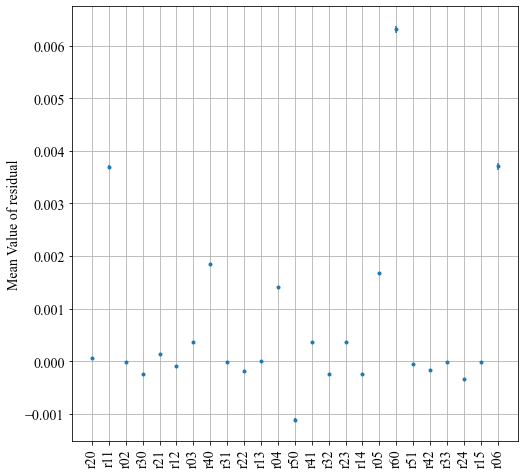

In [125]:
fig, ax = plt.subplots(1,1,figsize=(8, 8)) 
mappable = ax.errorbar(list(range(25)), mean_data[25:], var_data[25:], fmt = '.' )

ax.set_xticks(np.arange(0,25,1))
ax.set_xticklabels(label_list[25:], rotation='vertical', fontsize=14)

plt.grid()
plt.ylabel("Mean Value of residual")


In [144]:
import pickle
with open('../plots2/pickle/moment_average.pkl','wb') as f:
    pickle.dump([mean_residual_list,label_list,var_data,twentyfive, seventyfive  ],f)

Text(0, 0.5, 'Mean Value of residual')

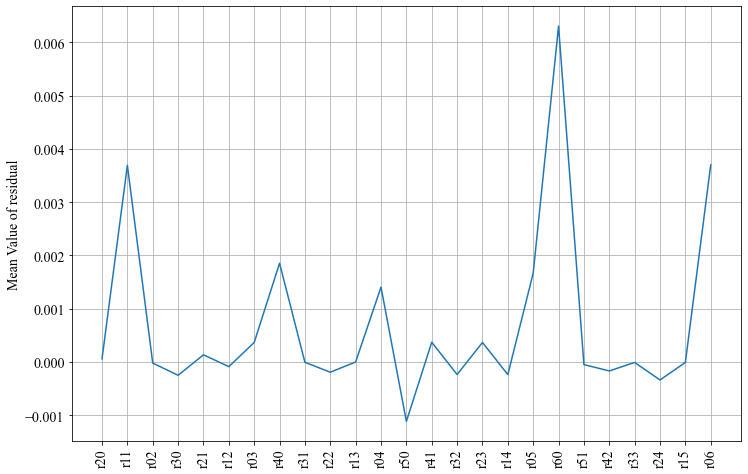

In [106]:
fig, ax = plt.subplots(1,1,figsize=(12, 8)) 
mappable = ax.plot(list(range(25)), mean_residual_list)

ax.set_xticks(np.arange(0,25,1))
ax.set_xticklabels(label_list[25:], rotation='vertical', fontsize=14)

plt.grid()
plt.ylabel("Mean Value of residual")


In [96]:
blend_flux = np.array(list(catalog['iblendedness_abs_flux']))

In [97]:
index = blend_flux

m02_high = residual_list[0][blend_flux>0.3]

In [98]:
print np.max(blend_flux)

0.41553241


In [99]:
def meansure_bin_average(x_array, y_array, nbin):
    x_min = np.min(x_array)
    x_max = np.max(x_array)
    bin_width = (x_max-x_min)/nbin

    x_out = []
    y_out = []
    x_error = []
    y_error = []
    ngal = []
    
    for i in range(nbin):
        bin_min = x_min+i*bin_width
        bin_max = x_min+(i+1)*bin_width
        
        sub_x = x_array[x_array<bin_max][x_array[x_array<bin_max]>bin_min]
        ngal.append(sub_x.shape[0])
        condition_y = ((x_array>=bin_min) & (x_array < bin_max))*y_array
        sub_y = condition_y[condition_y!=0]
        if sub_y.shape[0]==0:
            continue

        y_out.append(np.mean(sub_y))
        y_error.append(np.std(sub_y) / np.sqrt(len(sub_y)))
        x_out.append(np.mean(sub_x))
        x_error.append(np.std(sub_x))
    return x_out, x_error, y_out, y_error, ngal

In [100]:
def meansure_bin_average_equal_size(x_array, y_array, nbin):

    x_out = []
    y_out = []
    x_error = []
    y_error = []
    ngal = []
    
    indices = np.argsort(x_array)
    x_array_sort = x_array[indices]
    y_array_sort = y_array[indices]
    bin_size = len(x_array)/nbin
    for i in range(nbin):
        
        sub_x = x_array_sort[i*bin_size:(i+1)*bin_size]
        sub_y = y_array_sort[i*bin_size:(i+1)*bin_size]
        ngal.append(bin_size)

        y_out.append(np.mean(sub_y))
        y_error.append(np.std(sub_y) / np.sqrt(len(sub_y)))
        x_out.append(np.mean(sub_x))
        x_error.append(np.std(sub_x))
    return x_out, x_error, y_out, y_error, ngal

In [101]:
print(type(residual_list))

<type 'numpy.ndarray'>


In [103]:
bmean, bvar, m20mean, m20err,ngal = meansure_bin_average_equal_size(blend_flux, residual_list[0] , 20)
bmean, bvar, m11mean, m11err,ngal = meansure_bin_average_equal_size(blend_flux, residual_list[1]/true_list[1] , 20)
bmean, bvar, m02mean, m02err,ngal = meansure_bin_average_equal_size(blend_flux, residual_list[2] , 20)

In [104]:
bmean

[0.0,
 0.0,
 1.165142853275677e-12,
 2.267341259082314e-09,
 3.022066928473786e-08,
 1.3376301690475328e-07,
 3.496299919592384e-07,
 6.865932823296461e-07,
 1.1482172358730223e-06,
 1.7614558691606327e-06,
 2.5835945816995178e-06,
 3.7177036746922766e-06,
 5.3264341260190395e-06,
 7.833678264306784e-06,
 1.232347008870877e-05,
 2.4174011018711452e-05,
 0.00012621622327510054,
 0.0008247414230943282,
 0.0029550961948940735,
 0.01992681615134822]

In [105]:
import pickle
with open('Test_Results/blendedness_cut_data.pkl','w') as f:
    pickle.dump([bmean, m20mean,m20err, m11mean,m11err, m02mean, m02err],f)

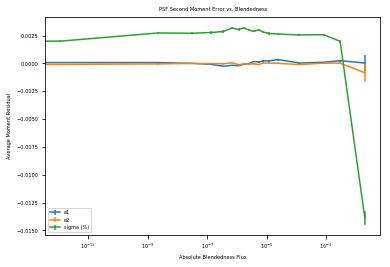

In [106]:
#plt.figure(figsize = (8,6))
plt.errorbar(bmean, m20mean, yerr = m20err, label = 'e1')
plt.errorbar(bmean, m02mean, yerr = m02err, label = 'e2')
plt.errorbar(bmean, m11mean, yerr = m11err, label = 'sigma (%)')

plt.xlabel('Absolute Blendedness Flux')
plt.ylabel('Average Moment Residual')
plt.legend()
plt.xscale('log')
#plt.ylim([-0.5,0.4])
plt.title('PSF Second Moment Error vs. Blendedness')
plt.show()

# plt.plot(bmean,ngal)
# plt.yscale('log')
# plt.xlabel('Absolute Blendedness Flux')
# plt.ylabel('Number of Sample')
# plt.show()

In [267]:
print np.mean(residual_list[1]), m11mean[0]

0.0020534372194331726 0.00328087184861


In [209]:
(residual_list[0] > 0.1) & ( residual_list[0] < 0.5)

array([False, False, False, ..., False, False, False])

In [35]:
a = np.arange(10)*10
print a

[ 0 10 20 30 40 50 60 70 80 90]


In [185]:
conditioned_m = ((a>30)*a)
non_zero_m = conditioned_m[conditioned_m!=0]

In [192]:
print a[a<20][a[a<20]>0]

[10]


In [39]:
index = np.argsort(a)
a[index]

array([ 0, 10, 20, 30, 40, 50, 60, 70, 80, 90])

In [65]:
print np.mean(true_11)*0.17

0.24368270739822032


In [7]:
print params1_dir

{(1, 3): array([-3.08363862e-01, -2.45625916e-02, -8.07767299e-09]), (3, 0): array([ 1.80765333e-01, -1.23368062e-05,  4.14593562e-08]), (2, 1): array([ 3.87270604e-01,  4.43376721e-06, -1.19544003e-08]), (5, 1): array([ 1.75606417e-02,  2.84117339e-04, -1.42746124e-09]), (0, 3): array([-1.80257877e-01,  5.73772662e-06, -1.92855734e-08]), (4, 0): array([1.16192245e+00, 4.75960286e-01, 6.42282874e-08]), (1, 2): array([-3.87932434e-01,  2.61207977e-06, -3.54982723e-10]), (3, 3): array([2.47927017e-03, 1.09072339e-02, 4.65109081e-11]), (1, 5): array([-1.90429760e-02,  2.91756470e-04, -3.89107795e-10]), (5, 0): array([ 1.39272487e-02, -1.75637956e-05, -1.93967610e-09]), (0, 4): array([-1.16202208e+00, -4.75960223e-01, -6.05351959e-08]), (4, 1): array([ 6.01127598e-02, -2.38546908e-06,  1.13113837e-08]), (3, 2): array([-8.56202693e-02, -8.04870001e-07,  7.53850744e-09]), (2, 2): array([-9.07205308e-05,  9.74513905e-07, -9.97415463e-10]), (6, 0): array([ 3.33548904e-02, -9.21944252e-02,  3.0

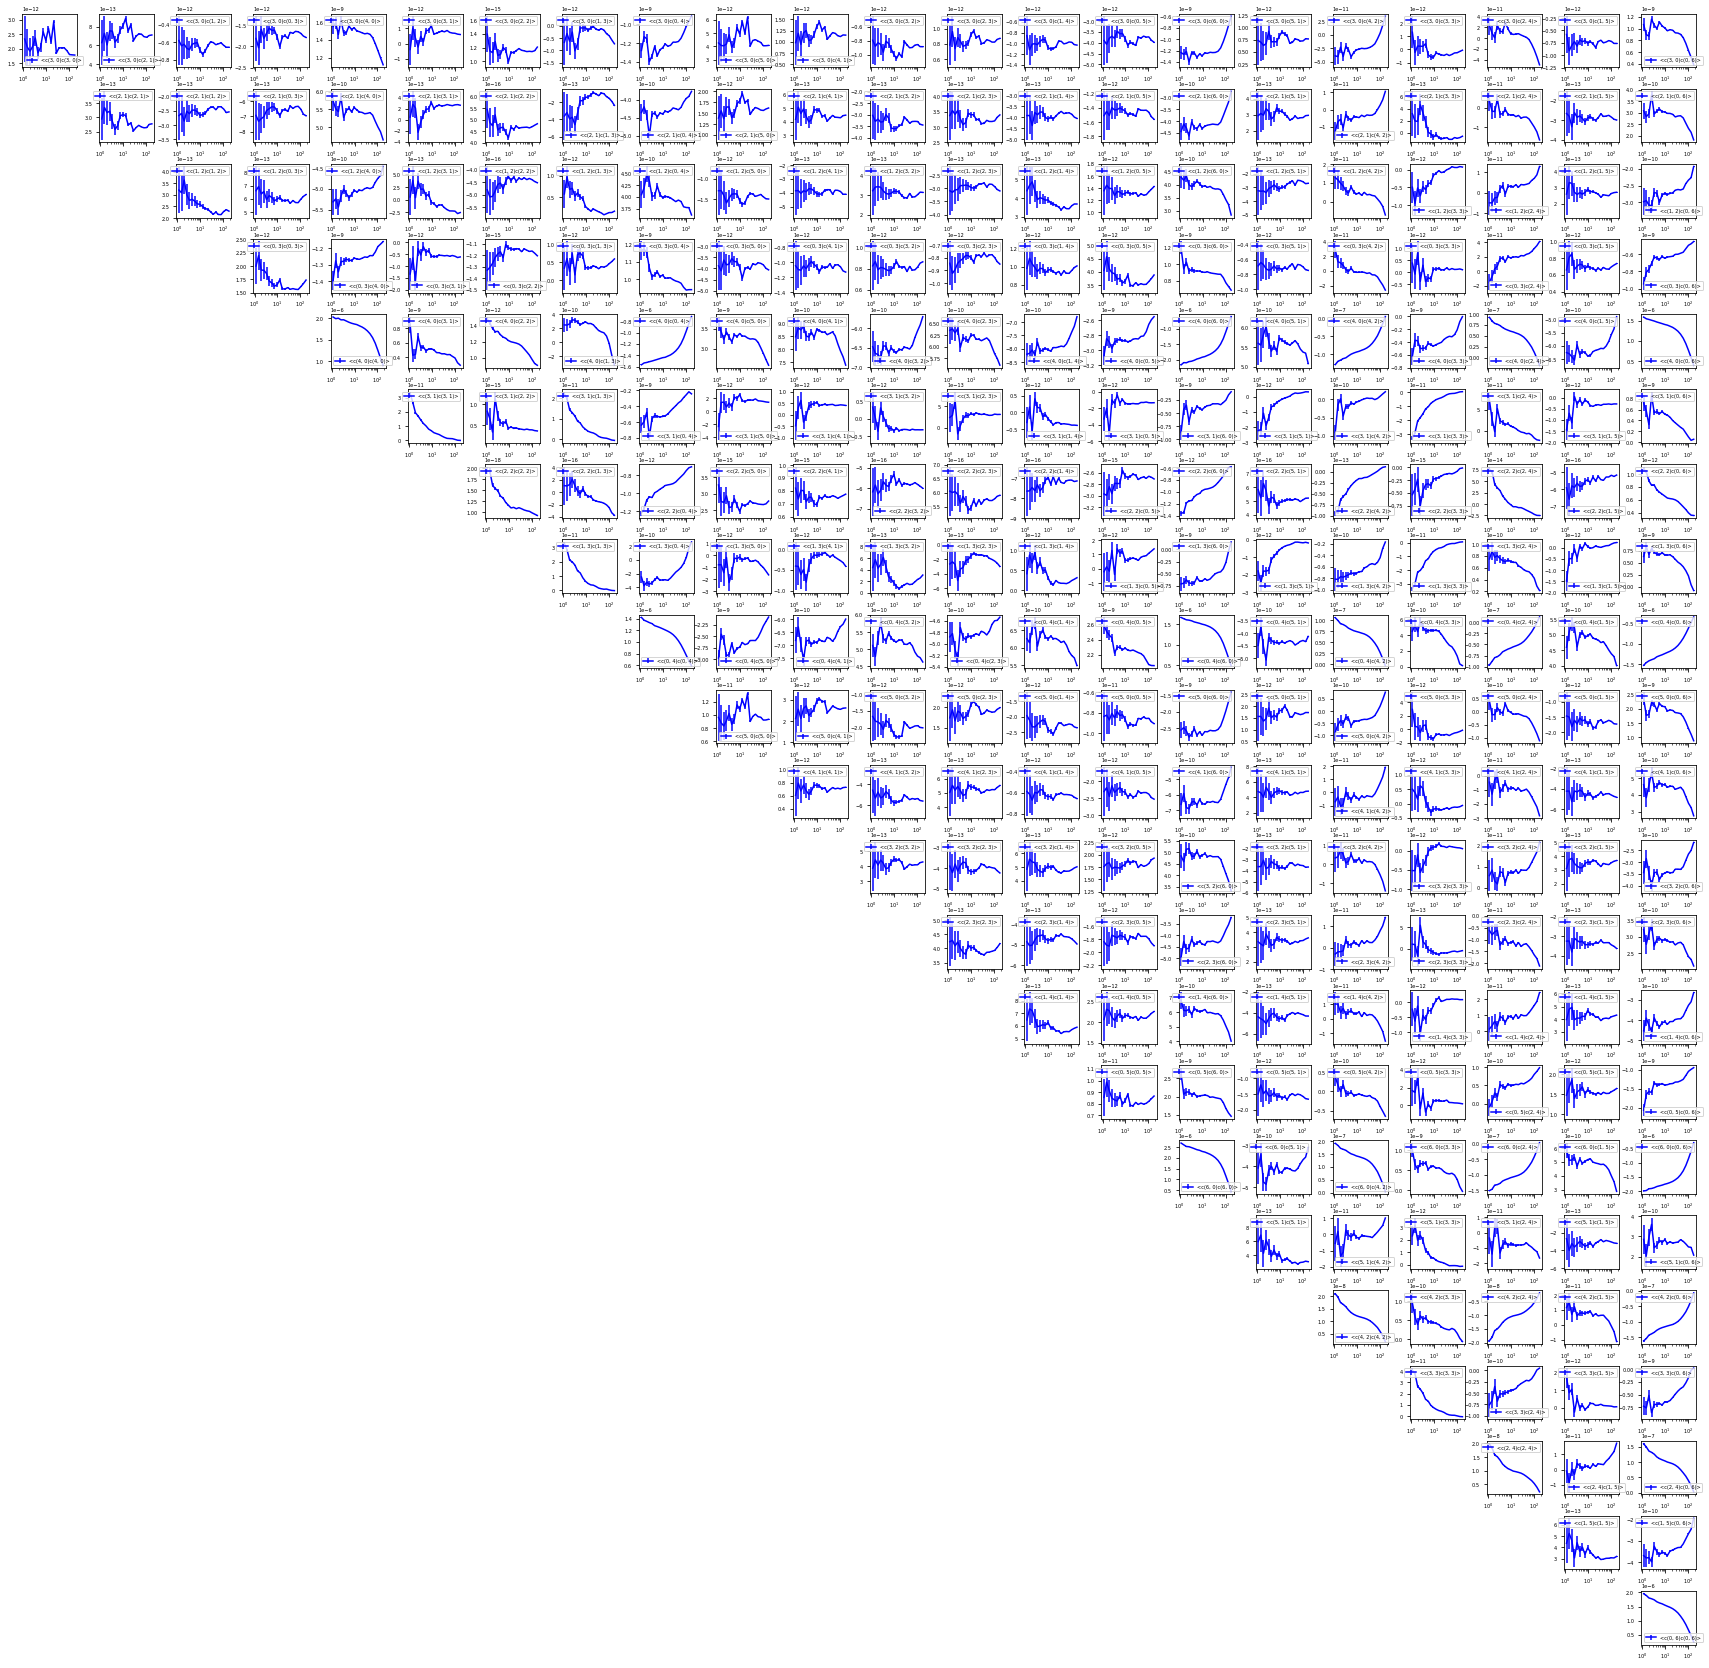

In [44]:
BIGGER_SIZE = 5
plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title



plt.figure(figsize = (30,30))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.4, hspace=0.4)

for i in range(nob):
    for j in range(i,nob):

        pq1 = pqlist[i+3]
        pq2 = pqlist[j+3]
        
        
        #print this_correlation
        label1 = "<c" + str(pq1) + "c" + str(pq2)+">"
        
        
        plt.subplot(nob,nob,22*i+j+1)
        plt.errorbar(r,xi_1[i][j],xi1_sig[i][j], color = 'blue',label = label1)
        plt.ticklabel_format(axis='y',style='sci',scilimits=(0,3))
        plt.xscale('log')
        #plt.ylim([-1,1])
        #plt.title(str(round(this_correlation, 2)))
        plt.legend()

plt.savefig('HSCMaps/c1_corr.png', dpi = 300)

In [320]:
xi_1 = np.load('HSCMaps/c_data/xi_1.npy')
xi1_sig = np.load('HSCMaps/c_data/xi1_sig.npy')
xi1_cov = np.load('HSCMaps/c_data/xi1_cov.npy')
r = np.load("HSCMaps/c_data/r1.npy")
nob = 22


In [321]:
xi_2 = np.load('HSCMaps/c_data/xi_2.npy')
xi2_sig = np.load('HSCMaps/c_data/xi2_sig.npy')
xi2_cov = np.load('HSCMaps/c_data/xi2_cov.npy')

r = np.load("HSCMaps/c_data/r2.npy")


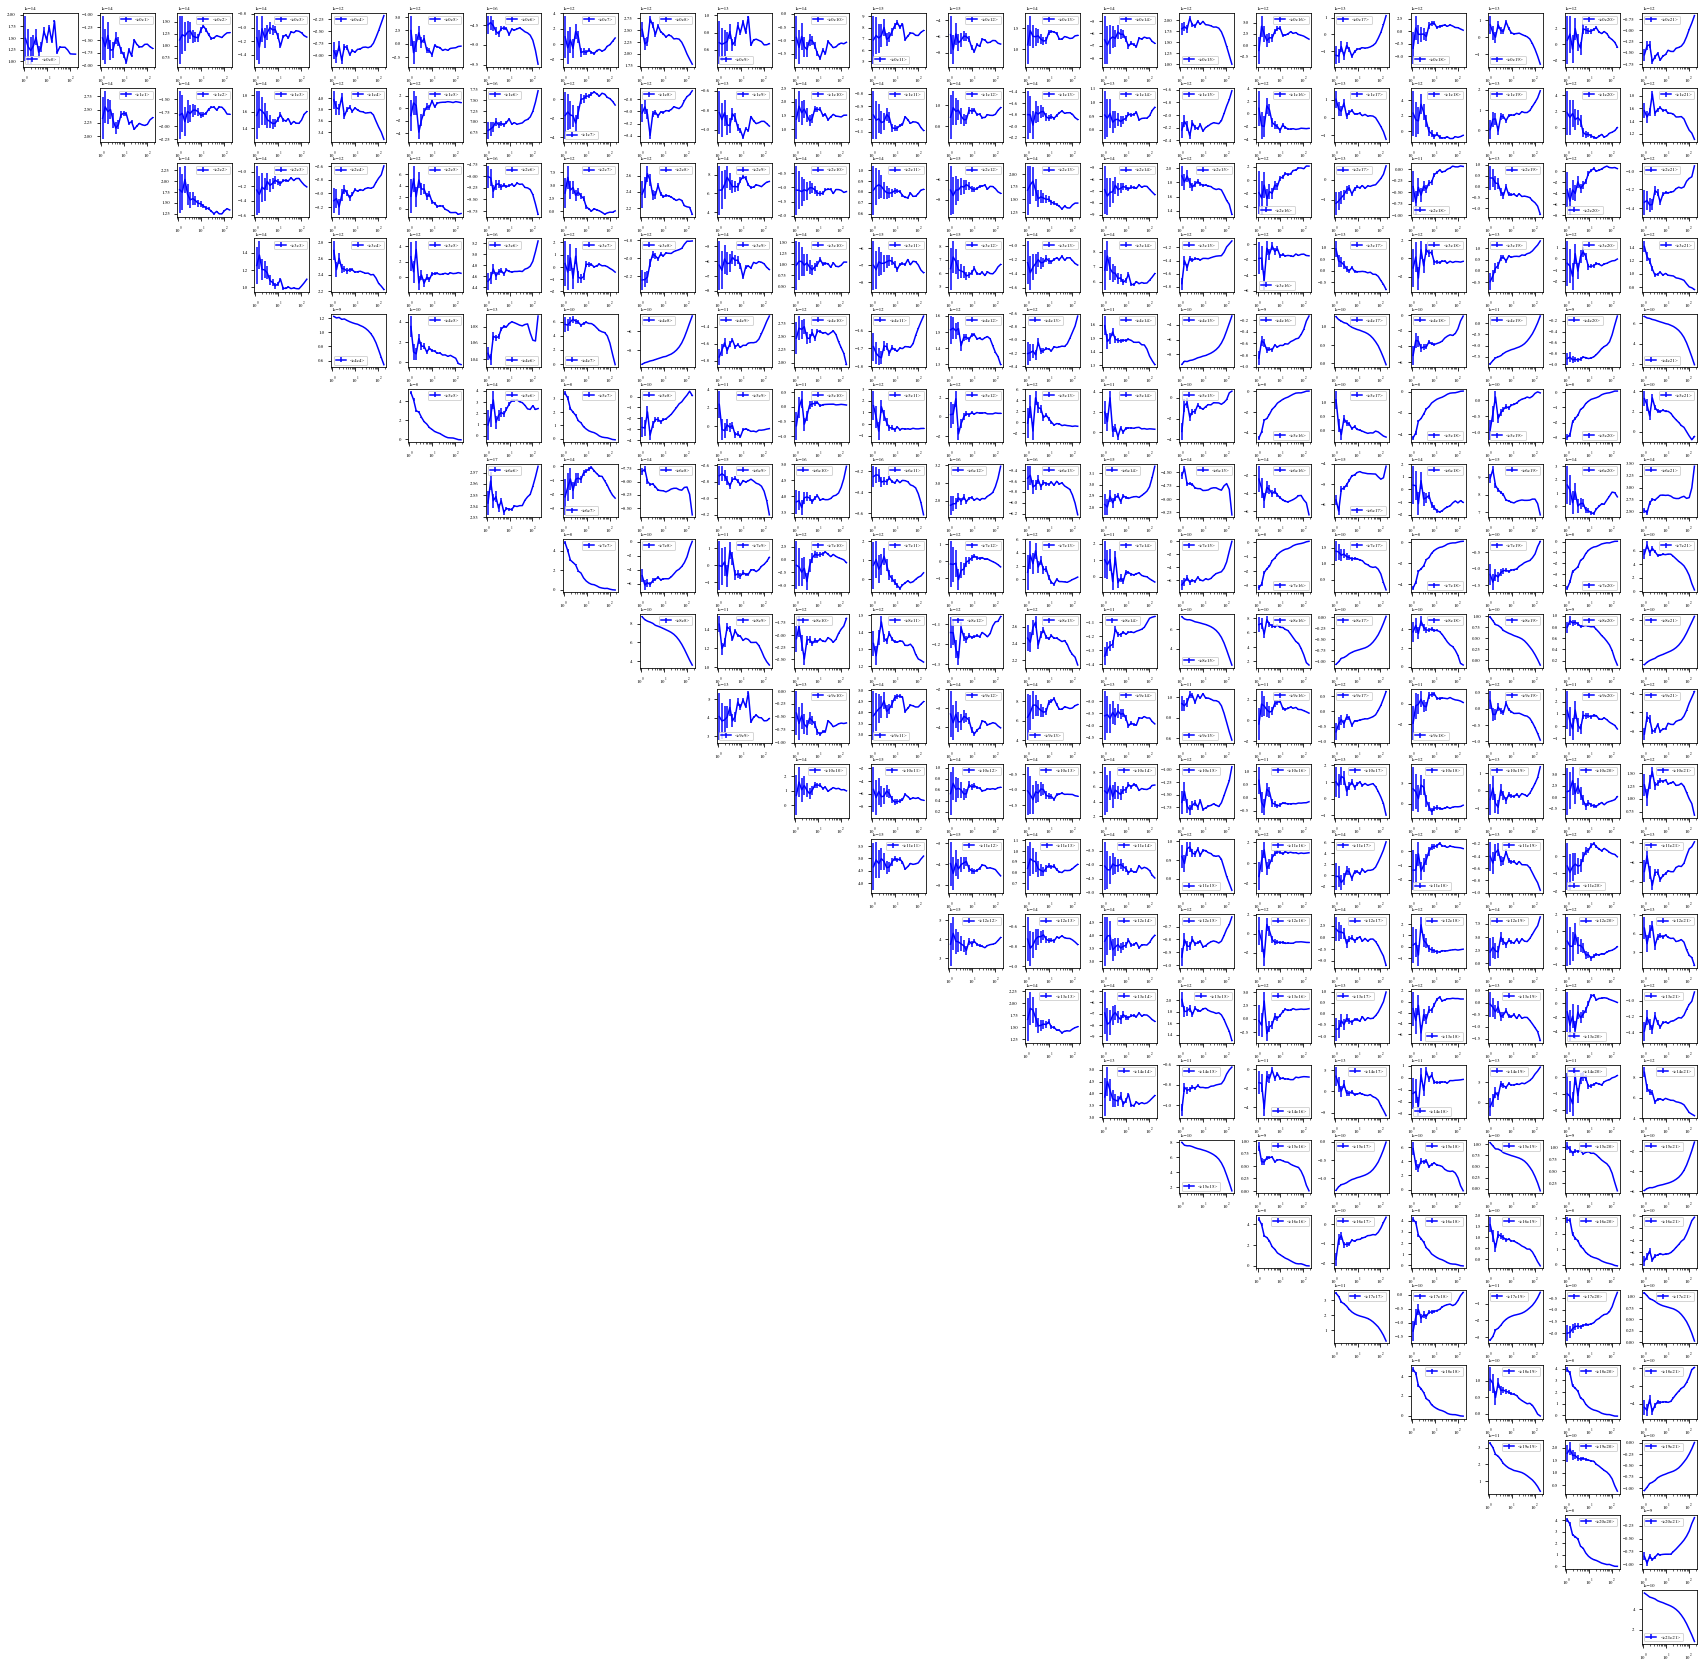

In [37]:
BIGGER_SIZE = 5
plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title



plt.figure(figsize = (30,30))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.4, hspace=0.4)

nob = 22
for i in range(nob):
    for j in range(i,nob):

            
        #print this_correlation
        label1 = "<c" + str(i) + "c" + str(j)+">"
        
        
        plt.subplot(nob,nob,22*i+j+1)
        plt.errorbar(r,xi_2[i][j],xi2_sig[i][j], color = 'blue',label = label1)
        plt.ticklabel_format(axis='y',style='sci',scilimits=(0,3))
        plt.xscale('log')
        #plt.ylim([-1,1])
        #plt.title(str(round(this_correlation, 2)))
        plt.legend()

plt.savefig('HSCMaps/c2_corr.png', dpi = 300)

In [322]:
for i in range(nob):
    for j in range(0,i):
        xi_1[i][j] = xi_1[j][i]
        xi_2[i][j] = xi_2[j][i]

In [323]:
c1_total =  np.sum(np.sum(xi_1,axis = 0),axis = 0)
c1_sig_total = np.sum(np.sum(xi1_sig,axis = 0),axis = 0)
c1_cov_total = np.sum(np.sum(xi1_cov,axis = 0),axis = 0)

In [324]:
c2_total =  np.sum(np.sum(xi_2,axis = 0),axis = 0)
c2_sig_total = np.sum(np.sum(xi2_sig,axis = 0),axis = 0)
c2_cov_total = np.sum(np.sum(xi2_cov,axis = 0),axis = 0)

In [325]:
c1_total.shape

(20,)

In [326]:
print( np.sqrt(np.diag(c2_cov_total)))

[6.99327098e-09 5.41283348e-09 4.16123770e-09 3.20380462e-09
 2.46695116e-09 1.90191025e-09 1.46621625e-09 1.13108887e-09
 8.73501385e-10 6.75371848e-10 5.23163816e-10 4.06446502e-10
 3.16868563e-10 2.48063525e-10 1.96764940e-10 1.58341142e-10
 1.29442343e-10 1.09466722e-10 9.69452984e-11 8.90173346e-11]


$g = g_{true} + c_1 + c_2 + \dots$

$<g(x) g(x+\theta)> = <(g_{true}(x) + c_1(x) + c_2(x) + \dots)(g_{true}(x+\theta) + c_1(x+\theta) + c_2(x+\theta) + \dots)>$
$=<g_{true}(x) g_{true}(x+\theta)> + <c_1(x) c_1(x+\theta)> + <c_2(x) c_2(x+\theta)> + <c_1(x)c_2(x+\theta)> + <c_2(x) c_1(x+\theta)> + \dots$
$=\xi_{true} + \sum_{i,j} <c_i(x) c_j(x)>$

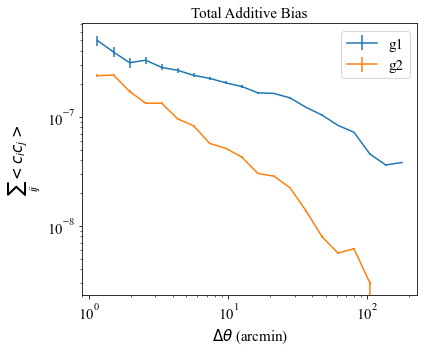

In [327]:

BIGGER_SIZE = 15
plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

plt.figure(figsize = (6,5))
plt.errorbar(r,c1_total,np.sqrt(np.diag(c1_cov_total)),label = 'g1')
plt.errorbar(r,c2_total,np.sqrt(np.diag(c2_cov_total)),label = 'g2')
plt.yscale('log')
plt.xscale('log')
plt.ylabel(r'$\sum_{ij} <c_i c_j>$')
plt.xlabel(r'$\Delta \theta$ (arcmin)')
plt.title("Total Additive Bias")
plt.legend()

In [50]:
def remove_index_i(C,i):
    dimension = C.shape[0]
    impact = 0.0
    answer = C.copy()
    answer[i,:] = np.zeros(dimension)
    answer[:,i] = np.zeros(dimension)
    return answer

def determine_remove_index(C,mask):
    dimension = C.shape[0]
    info_content = np.zeros(dimension)
    for i in range(dimension):
        info_content = np.sum(C,axis = 0) + np.sum(C,axis = 1) - C[i][i]
    for i in mask:
        info_content[i] = 9999.0
    remove_index = np.argmin(info_content)
    return remove_index

In [45]:
import pickle

In [267]:
with open('HSCMaps/c_data/xipm_correlation.pkl', 'rb') as f:
    xip,xim,xip_sig,xim_sig,xi_cov = pickle.load(f)

In [268]:
xip.shape

(22, 22, 20)

In [269]:
nob = 22
for i in range(nob):
    for j in range(0,i):
        xip[i][j] = xip[j][i]
        xim[i][j] = xim[j][i]

xip_total =  np.sum(np.sum(xip,axis = 0),axis = 0)
xip_sig_total = np.sum(np.sum(xip_sig,axis = 0),axis = 0)
xim_total =  np.sum(np.sum(xim,axis = 0),axis = 0)
xim_sig_total = np.sum(np.sum(xim_sig,axis = 0),axis = 0)

xi_cov_total = np.sum(np.sum(xi_cov,axis = 0),axis = 0)



In [270]:
Cij = np.sum(np.abs(xi_2), axis = 2)


total_dimension = 22
leave_element = 0

current_Cij = Cij.copy()
current_info = np.sum(Cij)
mask = []
info_history = []
remove_rank = []

for i in range(total_dimension - leave_element):
    remove_index = determine_remove_index(current_Cij,mask)
    current_Cij = remove_index_i(current_Cij,remove_index)
    current_info = np.sum(current_Cij)
    
    mask.append(remove_index)
    info_history.append(current_info)
    remove_rank.append(remove_index)
    

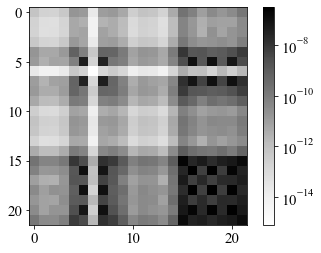

In [271]:
plt.imshow(Cij,cmap=plt.get_cmap("Greys"),norm = LogNorm())
plt.colorbar()
plt.show()

In [272]:
info_perc_integral = np.ones(22) - np.flip(np.array(info_history)/np.sum(Cij))
pqlist = [(3,0),(2,1),(1,2),(0,3),(4,0),(3,1),(2,2),(1,3),(0,4),(5,0),(4,1),(3,2),(2,3),(1,4),(0,5),(6,0),(5,1),(4,2),(3,3),(2,4),(1,5),(0,6)]
flip_rank = np.flip(np.array(remove_rank))
label_list = [str(pqlist[flip_rank[i]]) for i in range(len(pqlist))]


In [273]:
current_Cij = Cij.copy()
current_info = np.sum(Cij)
forward_info = []
forward_info.append(np.sum(Cij))
mask = []
for i in flip_rank:
    current_Cij = remove_index_i(current_Cij,i)
    current_info = np.sum(current_Cij)
    mask.append(i)
    forward_info.append(current_info)
forward_info_perc = np.array(forward_info)/np.sum(Cij)

In [78]:
# with open('../plots2/pickle/moment_ranking.pkl','wb') as f:
#     pickle.dump([forward_info_perc, info_perc_integral, label_list  ],f)
    
# with open('../plots2/pickle/moment_ranking1.pkl','wb') as f:
#     pickle.dump([forward_info_perc, info_perc_integral, label_list  ],f)
    
with open('../plots2/pickle/moment_ranking2.pkl','wb') as f:
    pickle.dump([forward_info_perc, info_perc_integral, label_list  ],f)

Text(0, 0.5, '$\\xi_+$ Cummulative Contribution')

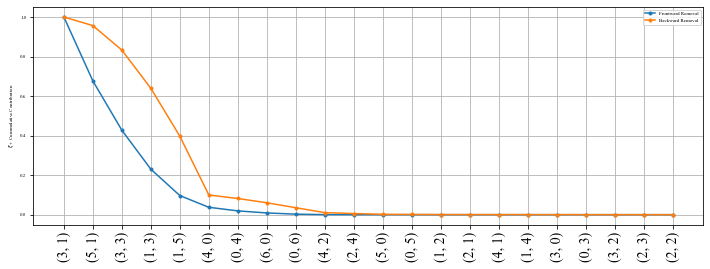

In [68]:

fig, ax = plt.subplots(1,1,figsize=(12, 4)) 
mappable = plt.plot(np.arange(1,23,1), forward_info_perc[:-1], '.-' , label = "Frontward Removal")
mappable = plt.plot(np.arange(1,23,1), info_perc_integral, '.-' , label = "Backward Removal")


ax.set_xticks(np.arange(1,23,1))
ax.set_xticklabels(label_list, rotation='vertical', fontsize=14)

plt.grid()
plt.legend()

plt.ylabel(r'$\xi_+$ Cummulative Contribution')





In [262]:
group1 = np.array([4,8,15,17,19,21])
group2 = np.array([5,7,16,18,20])

Text(0,0.5,'$<c_i c_j>$ Cummulative Contribution')

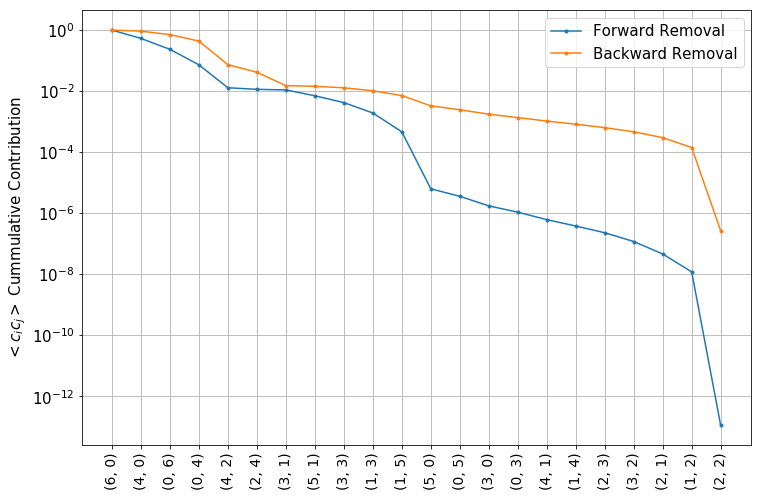

In [109]:

fig, ax = plt.subplots(1,1,figsize=(12, 8)) 
mappable = plt.plot(np.arange(1,23,1), forward_info_perc[:-1], '.-' , label = "Forward Removal")
mappable = plt.plot(np.arange(1,23,1), info_perc_integral, '.-' , label = "Backward Removal")


ax.set_xticks(np.arange(1,23,1))
ax.set_xticklabels(label_list, rotation='vertical', fontsize=14)

plt.grid()
plt.legend()

plt.yscale('log')
plt.ylabel(r'$<c_i c_j>$ Cummulative Contribution')





In [263]:
print(np.array(pqlist)[group1])

[[1 2]
 [1 3]
 [3 2]
 [5 0]
 [1 5]
 [3 3]]


In [328]:
xi1group1 = np.zeros(shape = (6,6,20))
xi2group1 = np.zeros(shape = (6,6,20))
xi1group2 = np.zeros(shape = (5,5,20))
xi2group2 = np.zeros(shape = (5,5,20))
for i in range(6):
    for j in range(i,6):
        xi1group1[i][j] = xi_1[group1[i]][group1[j]]
        xi2group1[i][j] = xi_2[group1[i]][group1[j]]
        
for i in range(5):
    for j in range(i,5):
        xi1group2[i][j] = xi_1[group2[i]][group2[j]]
        xi2group2[i][j] = xi_2[group2[i]][group2[j]]
        
for i in range(6):
    for j in range(0,i):
        xi1group1[i][j] = xi1group1[j][i]
        xi2group1[i][j] = xi2group1[j][i]
        
for i in range(5):
    for j in range(0,i):
        xi1group2[i][j] = xi1group2[j][i]
        xi2group2[i][j] = xi2group2[j][i]
        
        
c1group1total =  np.sum(np.sum(xi1group1,axis = 0),axis = 0)
c2group1total =  np.sum(np.sum(xi2group1,axis = 0),axis = 0)

c1group2total =  np.sum(np.sum(xi1group2,axis = 0),axis = 0)
c2group2total =  np.sum(np.sum(xi2group2,axis = 0),axis = 0)

In [329]:
with open('../plots2/pickle/two_groups.pkl','wb') as f:
    pickle.dump([r, c1_total, c2_total, c1_cov_total, c2_cov_total, c2group2total ,c1group1total  ],f)

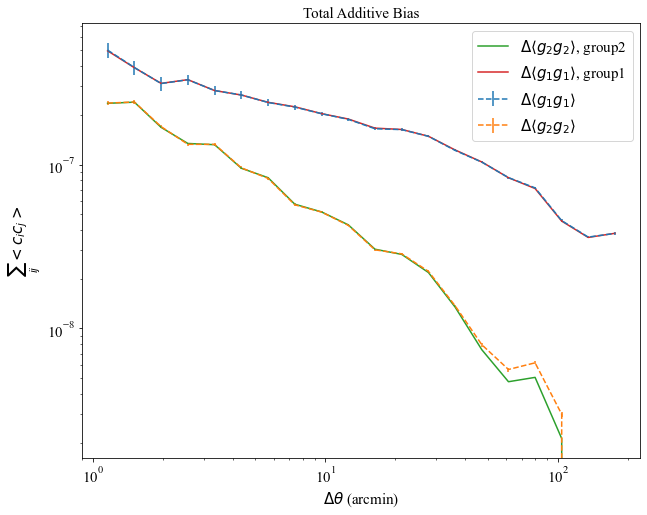

In [330]:

BIGGER_SIZE = 15
plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

plt.figure(figsize = (10,8))
plt.errorbar(r,c1_total,np.sqrt(np.diag(c1_cov_total)),fmt = '--',label = r'$\Delta \langle g_1 g_1 \rangle $')
plt.errorbar(r,c2_total,np.sqrt(np.diag(c2_cov_total)),fmt = '--',label = r'$\Delta \langle g_2 g_2 \rangle $')

#plt.plot(r,c1group2total, label = r'$\Delta \langle g_1 g_1 \rangle $, group2')
plt.plot(r,c2group2total, label = r'$\Delta \langle g_2 g_2 \rangle $, group2')

plt.plot(r,c1group1total, label = r'$\Delta \langle g_1 g_1 \rangle $, group1')
#plt.plot(r,c2group1total, label = r'$\Delta \langle g_2 g_2 \rangle $, group1')





plt.yscale('log')
plt.xscale('log')
plt.ylabel(r'$\sum_{ij} <c_i c_j>$')
plt.xlabel(r'$\Delta \theta$ (arcmin)')
plt.title("Total Additive Bias")
plt.legend()

In [115]:
nob

22

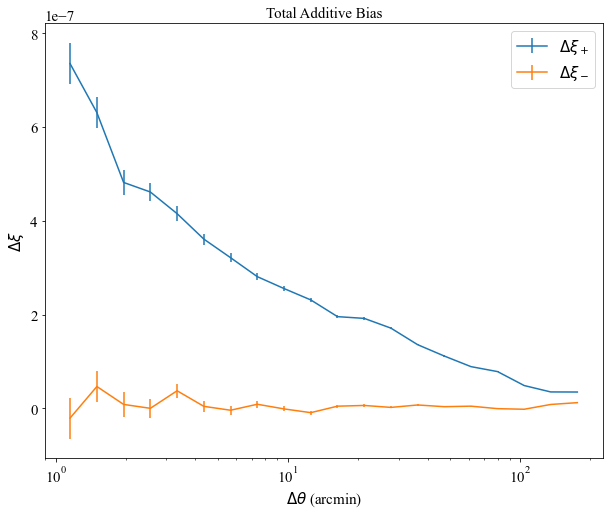

In [336]:

BIGGER_SIZE = 15
plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

plt.figure(figsize = (10,8))
plt.errorbar(r,xip_total,np.sqrt(np.diag(xi_cov_total))[:20],label = r'$\Delta \xi_+$')
plt.errorbar(r,xim_total,np.sqrt(np.diag(xi_cov_total))[20:],label = r'$\Delta \xi_-$')



#plt.yscale('log')
plt.xscale('log')
plt.ylabel(r'$\Delta \xi$')
plt.xlabel(r'$\Delta \theta$ (arcmin)')
plt.title("Total Additive Bias")
plt.legend()

In [14]:
print np.mean(true_list[1]) * 0.168

0.24067041896474392


In [406]:
with open('data/add_prelim_new.pkl','rb') as f:
    r, xip, xim, xip_sig, xim_sig, xi_cov = pickle.load(f)

In [407]:
nob = 22
for i in range(nob):
    for j in range(0,i):
        xip[i][j] = xip[j][i]
        xim[i][j] = xim[j][i]

In [408]:
xip_total =  np.sum(np.sum(xip,axis = 0),axis = 0)
xip_sig_total = np.sum(np.sum(xip_sig,axis = 0),axis = 0)
xi_cov = np.sum(np.sum(xi_cov, axis = 0), axis = 0)


In [409]:
xim_total =  np.sum(np.sum(xim,axis = 0),axis = 0)
xim_sig_total = np.sum(np.sum(xim_sig,axis = 0),axis = 0)


In [361]:
xim_sig_total

array([1.86241155e-07, 1.44151766e-07, 1.10819918e-07, 8.53220583e-08,
       6.56985603e-08, 5.06506846e-08, 3.90475087e-08, 3.01225704e-08,
       2.32626346e-08, 1.79861518e-08, 1.39326266e-08, 1.08242719e-08,
       8.43867877e-09, 6.60629879e-09, 5.24014155e-09, 4.21685894e-09,
       3.44724116e-09, 2.91526080e-09, 2.58179676e-09, 2.37066336e-09])

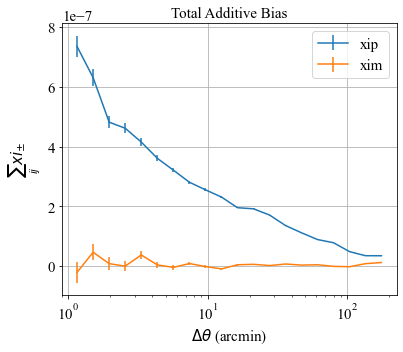

In [362]:

BIGGER_SIZE = 15
plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

plt.figure(figsize = (6,5))
plt.errorbar(r,xip_total,np.sqrt(np.diag(xi_cov_total))[:20],label = 'xip')
plt.errorbar(r,xim_total,np.sqrt(np.diag(xi_cov_total))[20:],label = 'xim')
#plt.yscale('log')
plt.xscale('log')
plt.ylabel(r'$\sum_{ij} xi_{\pm}$')
plt.xlabel(r'$\Delta \theta$ (arcmin)')
plt.title("Total Additive Bias")
plt.legend()
plt.grid()

In [412]:
import pickle
with open('../plots2/pickle/additive_prelim.pkl','wb') as f:
    pickle.dump([r, xip_total, xip_sig_total, xim_total, xim_sig_total, xi_cov_total   ],f)

In [30]:
#get random residual points

random = np.random.randint(residual_list.shape[1], size = 100)
residual_samples = residual_list[:,random]
np.save( '../shapelet/data/residual_sample100.npy', residual_samples)

In [28]:
print(residual_samples.shape)

(25, 100)


In [342]:
c1_plus_c2 = c1_total+c2_total
c1_minus_c2 = c1_total-c2_total

c1c2_cov = c1_cov_total + c2_cov_total
c1c2_cov_m = c1_cov_total - c2_cov_total

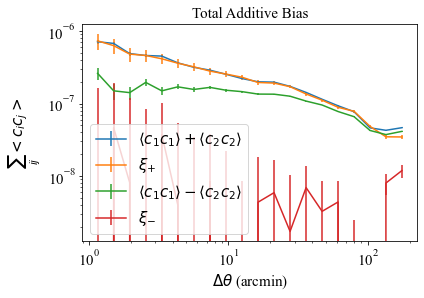

In [345]:
plt.errorbar(r,c1c2,np.sqrt(np.diag(c1c2_cov)),label = r'$\langle c_1 c_1 \rangle + \langle c_2 c_2 \rangle$')
plt.errorbar(r,xip_total,xip_sig_total,label = r'$\xi_{+}$')

plt.errorbar(r,c1_minus_c2,np.sqrt(np.diag(c1c2_cov_m)),label = r'$\langle c_1 c_1 \rangle - \langle c_2 c_2 \rangle$')
plt.errorbar(r,xim_total,xim_sig_total,label = r'$\xi_{-}$')


plt.xscale('log')
plt.yscale('log')
plt.ylabel(r'$\sum_{ij} <c_i c_j>$')
plt.xlabel(r'$\Delta \theta$ (arcmin)')
plt.title("Total Additive Bias")
plt.legend()

In [355]:
with open('HSCMaps/c_data/c1_xipm.pkl', 'rb') as f:
    r1, xip1,xim1,xip1_sig,xim1_sig,xi1_cov = pickle.load(f)

In [365]:
nob = 22
for i in range(nob):
    for j in range(0,i):
        xip1[i][j] = xip1[j][i]
        xim1[i][j] = xim1[j][i]

xip1_total =  np.sum(np.sum(xip1,axis = 0),axis = 0)
xip1_sig_total = np.sum(np.sum(xip1_sig,axis = 0),axis = 0)
xim1_total =  np.sum(np.sum(xim1,axis = 0),axis = 0)
xim1_sig_total = np.sum(np.sum(xim1_sig,axis = 0),axis = 0)

xi1_cov_total = np.sum(np.sum(xi1_cov,axis = 0),axis = 0)



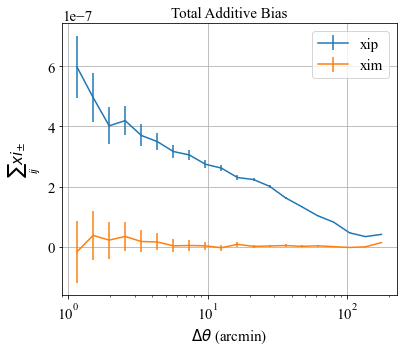

In [380]:


plt.figure(figsize = (6,5))
plt.errorbar(r,xip1_total,xip1_sig_total,label = 'xip')
plt.errorbar(r,xim1_total,xim1_sig_total,label = 'xim')
#plt.yscale('log')
plt.xscale('log')
plt.ylabel(r'$\sum_{ij} xi_{\pm}$')
plt.xlabel(r'$\Delta \theta$ (arcmin)')
plt.title("Total Additive Bias")
plt.legend()
plt.grid()

In [367]:
with open('HSCMaps/c_data/c2_xipm.pkl', 'rb') as f:
    r2, xip2,xim2,xip2_sig,xim2_sig,xi2_cov = pickle.load(f)

In [368]:
nob = 22
for i in range(nob):
    for j in range(0,i):
        xip2[i][j] = xip2[j][i]
        xim2[i][j] = xim2[j][i]

xip2_total =  np.sum(np.sum(xip2,axis = 0),axis = 0)
xip2_sig_total = np.sum(np.sum(xip2_sig,axis = 0),axis = 0)
xim2_total =  np.sum(np.sum(xim2,axis = 0),axis = 0)
xim2_sig_total = np.sum(np.sum(xim2_sig,axis = 0),axis = 0)

xi2_cov_total = np.sum(np.sum(xi2_cov,axis = 0),axis = 0)



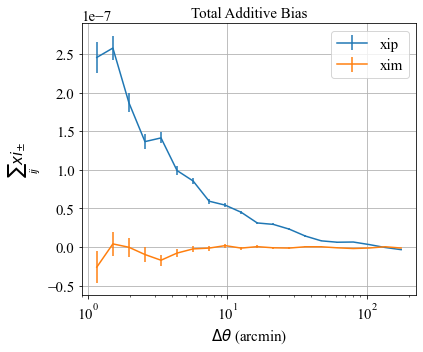

In [378]:


plt.figure(figsize = (6,5))
plt.errorbar(r,xip2_total,xip2_sig_total,label = 'xip')
plt.errorbar(r,xim2_total,xim2_sig_total,label = 'xim')
#plt.yscale('log')
plt.xscale('log')
plt.ylabel(r'$\sum_{ij} xi_{\pm}$')
plt.xlabel(r'$\Delta \theta$ (arcmin)')
plt.title("Total Additive Bias")
plt.legend()
plt.grid()

In [403]:
xip_c1pc2 = xip1_total + xip2_total
xip_sig_c1pc2 = xip1_sig_total + xip2_sig_total

xim_c1pc2 = xim1_total + xim2_total
xim_sig_c1pc2 = xim1_sig_total + xim2_sig_total

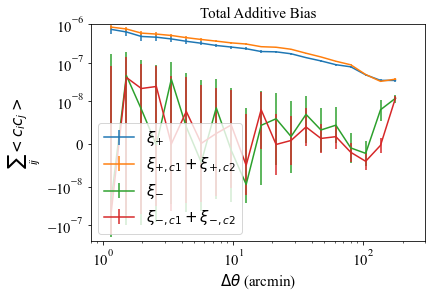

In [405]:
plt.errorbar(r,xip_total,xip_sig_total,label = r'$\xi_{+}$')
plt.errorbar(r,xip_c1pc2,xip_sig_c1pc2,label = r'$\xi_{+,c1} + \xi_{+,c2}$')

plt.errorbar(r,xim_total,xim_sig_total,label = r'$\xi_{-}$')
plt.errorbar(r,xim_c1pc2,xim_sig_c1pc2,label = r'$\xi_{-,c1} + \xi_{-,c2}$')

#plt.errorbar(r,xip1_total,np.sqrt(np.diag(xi1_cov_total))[:20],label = 'xip')

#plt.errorbar(r,xip2_total,np.sqrt(np.diag(xi1_cov_total))[20:],label = 'xip')


plt.xscale('log')
#plt.yscale('log')
plt.ylabel(r'$\sum_{ij} <c_i c_j>$')
plt.xlabel(r'$\Delta \theta$ (arcmin)')
plt.title("Total Additive Bias")
plt.yscale('symlog', linthresh = 1e-8)

plt.xlim([0.8,300])

plt.legend()

In [394]:
xim_c1mc2 = xim1_total - xim2_total
xim_sig_c1pc2 = xim1_sig_total + xim2_sig_total

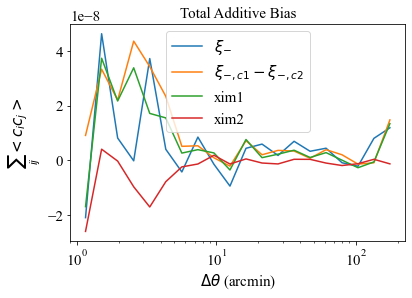

In [395]:
plt.errorbar(r,xim_total,label = r'$\xi_{-}$')
plt.errorbar(r,xim_c1mc2,label = r'$\xi_{-,c1} - \xi_{-,c2}$')

#plt.errorbar(r,xim1_total,np.sqrt(np.diag(xi1_cov_total))[20:],label = 'xim')
plt.errorbar(r,xim1_total,label = 'xim1')
plt.errorbar(r,xim2_total,label = 'xim2')



plt.xscale('log')
#plt.yscale('log')
plt.ylabel(r'$\sum_{ij} <c_i c_j>$')
plt.xlabel(r'$\Delta \theta$ (arcmin)')
plt.title("Total Additive Bias")
plt.legend()